# **Milestone 1 & 2**

## **LOAN DEFAULT PREDICTION**
## **Problem Definition**
### Context
One of the banks' primary sources of income is interest from home loans. Since a large proportion of their profits originate from these loans, a bank's major concern is the risk from loan defaults. Before the entry of machine learning, banks have been screening loan applicants manually through their loan approval process. This undertaking is complex since a lot of factors have to be taken into consideration during the rigorous review of the applicant’s available data - his financial and credit background. This assessment is not only a cumbersome endeavor but is also accompanied by human biases and errors coming from the personnel tasked to evaluate these loan applications.

With the emergence of data science, it is only prudent for banks to be proactive and employ machine learning tools and incorporate these in their underwriting process. The complexity due to the multi-dimensional client data can be handled with ease by these machines which makes this system more efficient plus the removal of human biases and errors in the equation. 

A bank's consumer credit department aims to simplify the decision-making process for home equity line of credit (HELOC) acceptance. They will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants, who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).

### Objectives
- To ascertain which client data items are most important to focus on in determining a client’s eligibility for a HELOC
- To determine what particular factors in a client's data have the most impact on loan defaults
- To build an optimal and interpretable machine learning model in determining the credit-worthiness of a HELOC applicant and predict if he is likely to default or not

### Key Questions
- What are the various variables that affect loan defaults?
- What are the decision rules or most important features for the HELOC application approval process?
- What would be the recommendations for the bank’s consumer credit department for the HELOC acceptance decision-making process?

### Problem Formulation
Using data science, different machine learning models need to be built and, from among these, the best one is chosen with the end in mind of achieving the bank's goal of simplifying their decision-making process in HELOC acceptance.
There is also a need to determine the performance metric that should be given priority in evaluating these models.
The final classification model must have the ability to predict clients who are likely to default on their loan and provide the basis for the prediction, which answers the question as to what client features/data are most important to consider during the HELOC approval process.
Finally, from the insights and conclusions derived in solving this machine learning problem, recommendations are brought before the bank .

## **Data Description**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm = pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first 5 rows

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows

data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data

data.shape

(5960, 13)

**Insights _______**
* The dataset has 5960 rows and 13 columns.

### **Check the data types of the columns**

In [7]:
# Check info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights _______**
* There are 5960 observations and 13 columns in the dataset.
* There are 11 numeric and 2 object datatypes. 
* The BAD and LOAN columns do not have missing values.
* All the other columns have missing values.

### **Check for missing values**

In [8]:
# Analyze missing values

data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
len(data)

5960

In [10]:
# Check the percentage of missing values in each column

data.isnull().sum()/len(data)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights _______**
- Only BAD and LOAN do not have missing values
- DEBTINC has the highest percentage of missing values at 21.26%
- VALUE has the least percentage of missing values at 1.88%

**We can convert the object type columns to categories**

`converting "object" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

# adding the target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

In [12]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
# Changing the datatype of object type columns to category

for i in cols:
    data[i] = data[i].astype('category')

In [14]:
# Checking the info again and the datatypes of the different variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze summary statistics of the dataset**

In [15]:
# Analyze the summary statistics for numerical variables

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights _______**
- The minimum amount of loan approved (LOAN) is 1100.00, the 75th percentile is 23300.00, while the maximum is 89900.00. These would indicate presence of outliers. The mean is 18607.97 while the median is 16300.00
- The minimum amount due on the existing mortgage (MORTDUE) is 2063.00, the 75th percentile is 91488.00 while the maximum is 399550.00. These would indicate presence of outliers. The mean is 73760.82 while the median is 65019.00
- The highest current value of the property (VALUE) is 855909.00 while the lowest is 8000.00
- Maximum DEROG is 10 while maximum DELINQ is 15
- Maximum CLAGE is 1168.23 and mean CLAGE is 179.77
- The highest NINQ is 17
- Maximum CLNO is 71 and 75th percentile is 26, which is a big difference
- Lowest DEBTINC is 0.52 while highest is 203.31, mean is 33.78 and median 34.82

In [16]:
# Check summary for categorical data

# data.describe(exclude = 'number').T 

data.describe(include = 'category').T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights _______**
- There are 4771 clients who repaid their loan
- There are 3928 clients whose reason for getting a loan is debt consolidation
- There are 6 unique job categories with Other having the most number of clients at 2388

In [17]:
# Checking the count of unique values in each column

data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

**Let's look at the unique values in all the categorical variables**

In [18]:
# Checking the count of unique values in each categorical column 

cols_cat = data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in', i, 'are:')
    print(cols_cat[i].nunique())
    
    print('*'*40)

Unique values in BAD are:
2
****************************************
Unique values in REASON are:
2
****************************************
Unique values in JOB are:
6
****************************************


In [19]:
# Printing the number of count of each unique value in each categorical column

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in', i, 'are :')
    print(cols_cat[i].value_counts())
    
    print('*' * 40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


**Insights _______**
- There are more clients who repaid their loan at 4771 against those clients who defaulted on their loan at 1189
- There are more clients who requested a loan for debt consolidation purposes at 3928. 1780 clients requested a loan for home improvement
- There are 6 categories of job type in this dataset with Other comprising the most number at 2388, followed by ProfExe at 1276

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plots and histograms to analyze the numerical columns.

In [20]:
# While doing univariate analysis of numerical variables, we want to study their central tendency and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplot and histogram for the variable.

def histogram_boxplot(feature, figsize = (15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax = ax_hist2, bins = bins, palette = 'winter') if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram
    plt.show()

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

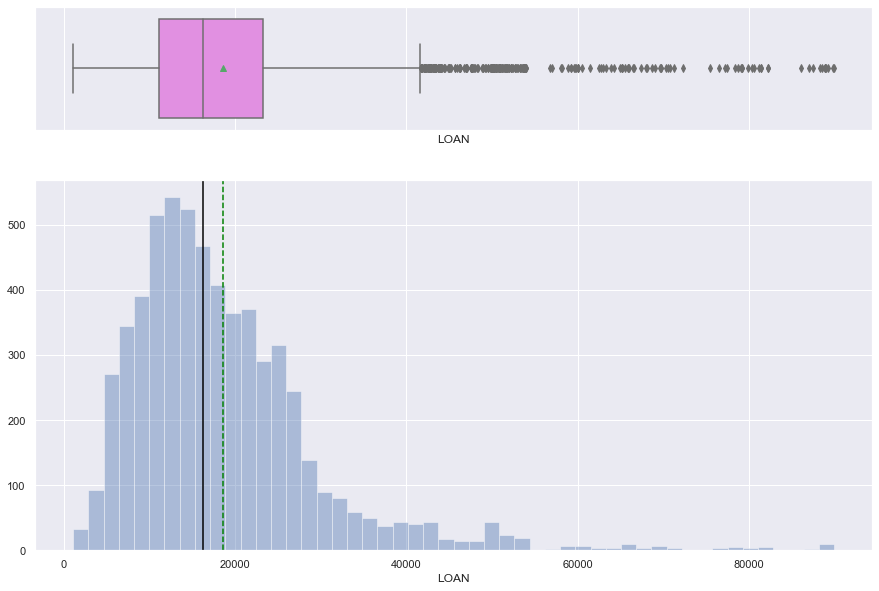

In [21]:
# Build the histogram boxplot for LOAN
histogram_boxplot(data['LOAN'])

**Insights _______**
- The LOAN plot is right-skewed with a lot of outliers.

#### **Note:** As done above, analyze Histogram and Boxplot for the other variables

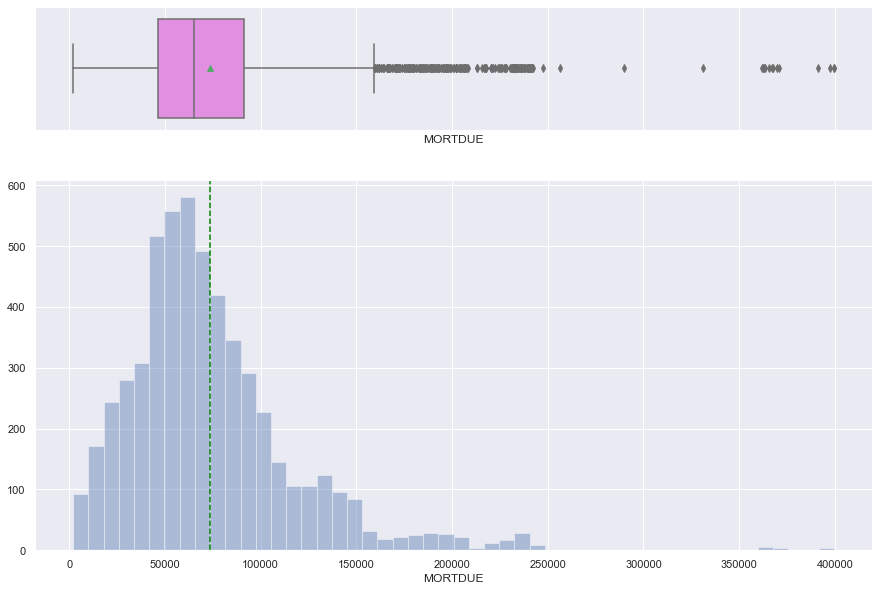

In [22]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'])

**Insights _______**
- The MORTDUE plot is right-skewed with a lot of outliers.
- Highest number is concentrated within the median.

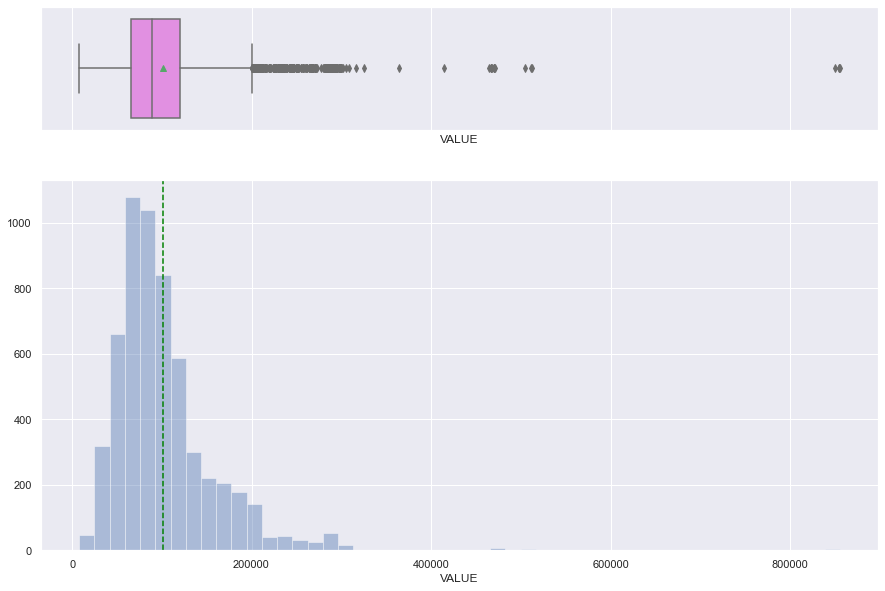

In [23]:
# Build the histogram boxplot for VALUE
histogram_boxplot(data['VALUE'])

**Insights _______**
- The VALUE plot is right-skewed with a lot of outliers.

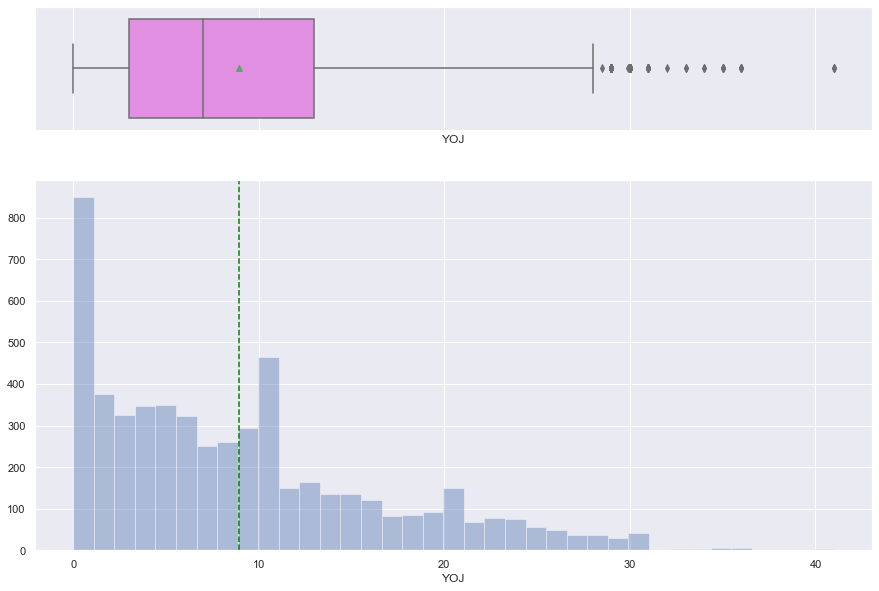

In [24]:
# Build the histogram boxplot for YOJ
histogram_boxplot(data['YOJ'])

**Insights _______**
- The YOJ plot is right-skewed with outliers.

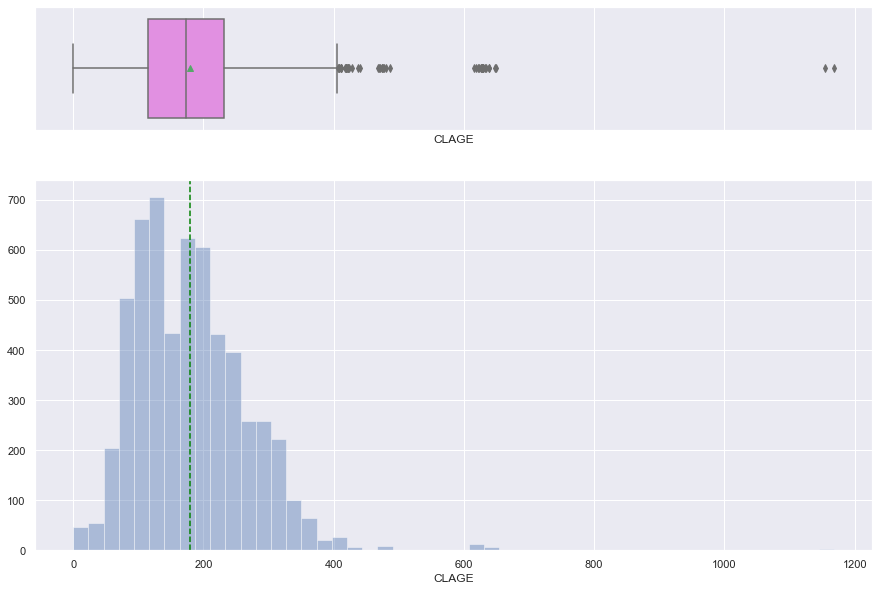

In [25]:
# Build the histogram boxplot for CLAGE
histogram_boxplot(data['CLAGE'])

**Insights _______**
- The CLAGE plot is bi-modal and has outliers.

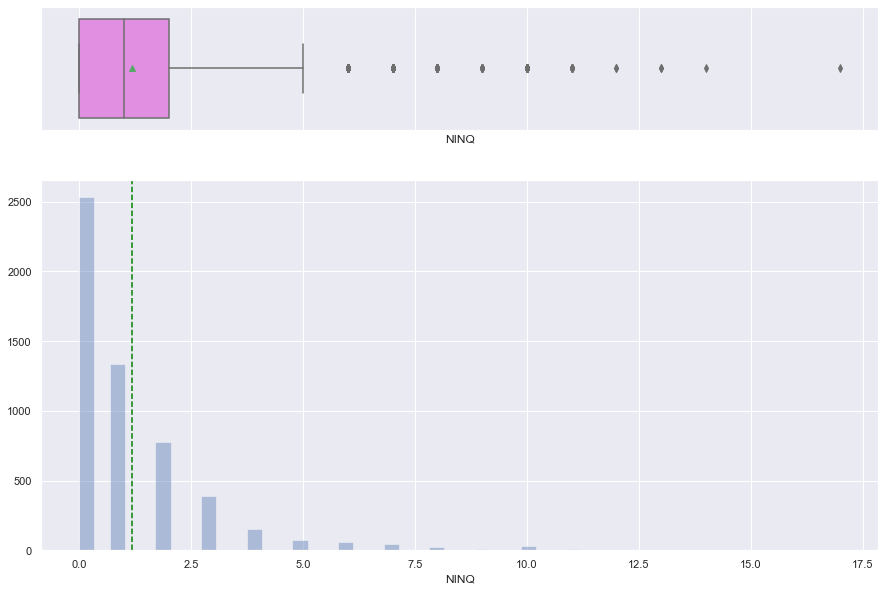

In [26]:
# Build the histogram boxplot for NINQ
histogram_boxplot(data['NINQ'])

**Insights _______**
- The NINQ plot has outliers
- The size is in descending order - as NINQ increases, the number of clients decreases

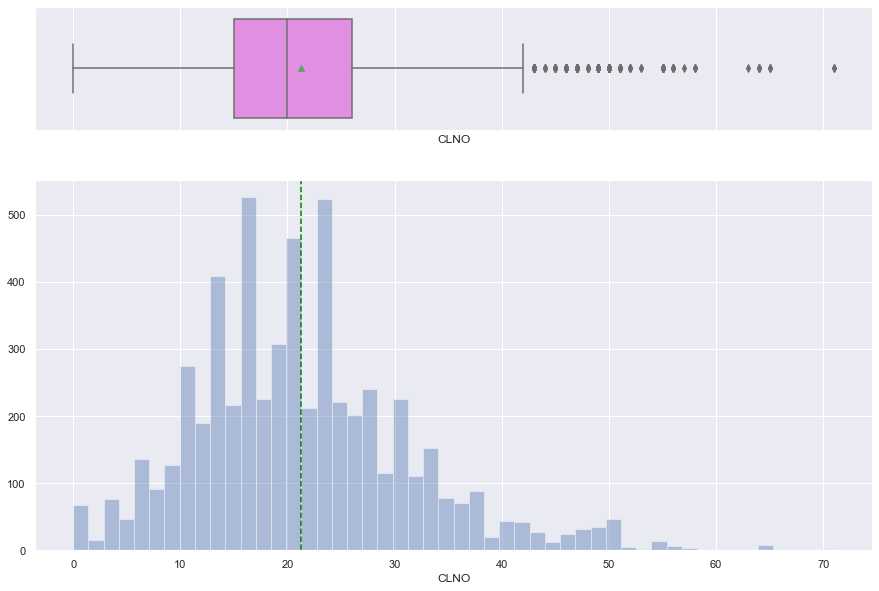

In [27]:
# Build the histogram boxplot for CLNO
histogram_boxplot(data['CLNO'])

**Insights _______**
- The CLNO plot shows variability and also has outliers.

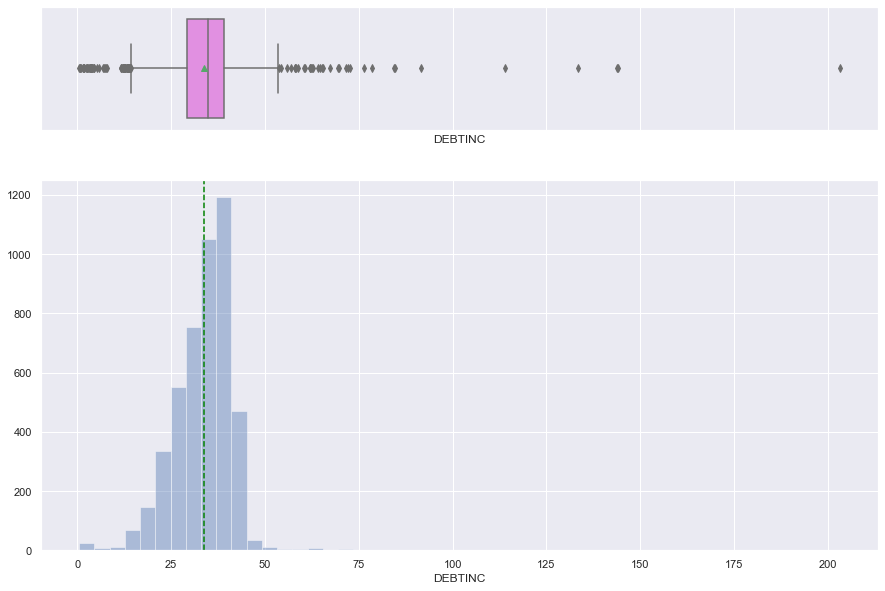

In [28]:
# Build the histogram boxplot for DEBTINC
histogram_boxplot(data['DEBTINC'])

**Insights _______**
- The DEBTINC plot has outliers in both directions -- below the minimum and above the maximum

### **2. Univariate Analysis - Categorical Data**

In [29]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

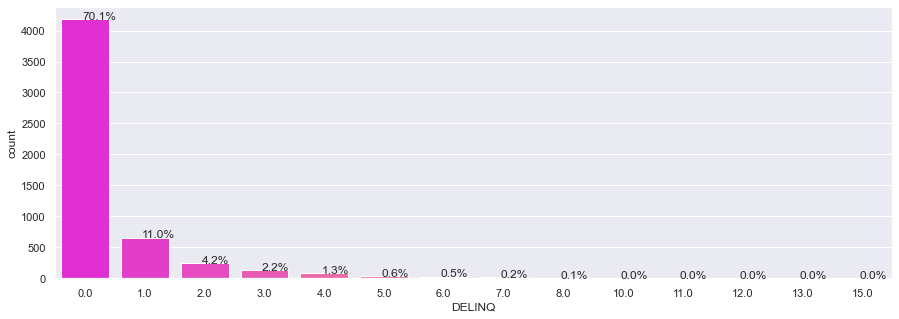

In [30]:
# Build barplot for DELINQ

plt.figure(figsize = (15,5))
ax = sns.countplot(data["DELINQ"], palette = 'spring')
perc_on_bar(ax, data["DELINQ"])

**Insights _______**
- The number of clients who have delinquent credit lines is highest at 1 delinquent credit line with 11% of the client population.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

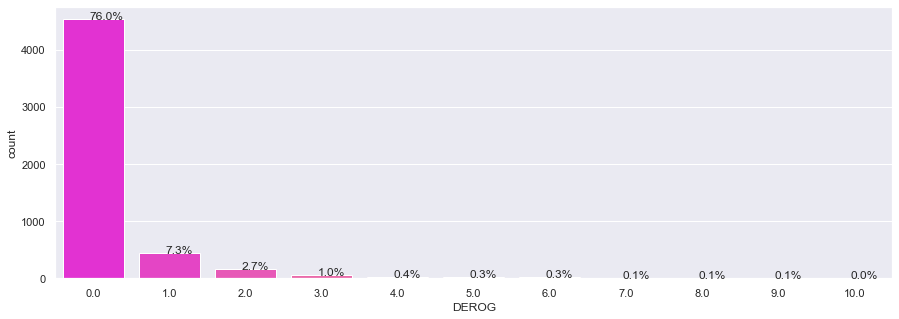

In [31]:
# Build barplot for DEROG

plt.figure(figsize = (15,5))
ax = sns.countplot(data["DEROG"], palette = 'spring')
perc_on_bar(ax, data["DEROG"])

**Insights _______**
- The number of clients who have major derogatory reports is highest at 1 major derogatory report with 7.3% of the client population.

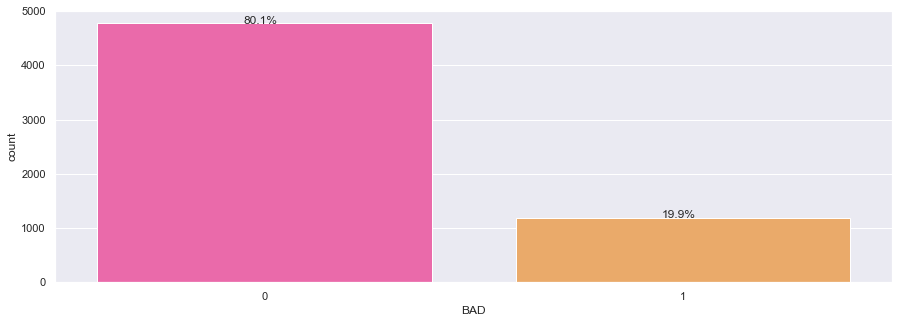

In [32]:
# Build barplot for BAD

plt.figure(figsize = (15,5))
ax = sns.countplot(data["BAD"], palette ='spring')
perc_on_bar(ax, data["BAD"])

**Insights _______**
- 19.9% of the client population make up the percentage who defaulted on their loans

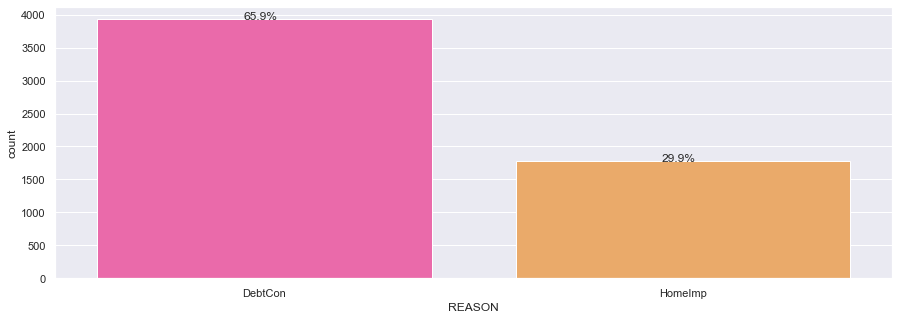

In [33]:
# Build barplot for REASON

plt.figure(figsize= (15,5))
ax = sns.countplot(data["REASON"], palette = 'spring')
perc_on_bar(ax, data["REASON"])

**Insights _______**
- Debt consolidation makes up 65.9% of the reason for a loan request, while 29.9% had home improvement as the reason.

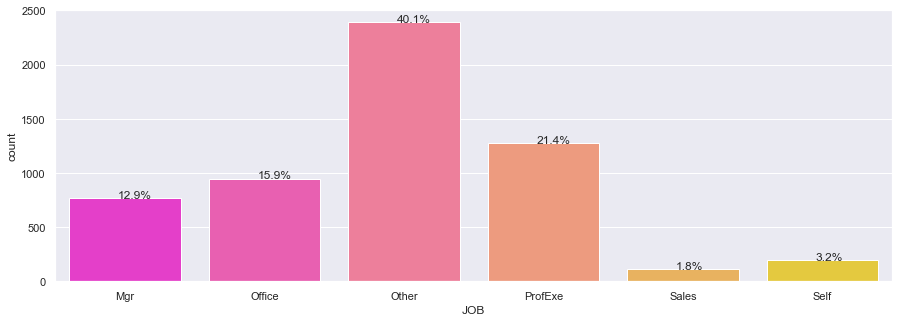

In [34]:
# Build barplot for JOB

plt.figure(figsize = (15,5))
ax = sns.countplot(data["JOB"], palette = 'spring')
perc_on_bar(ax, data["JOB"])

**Insights _______**
- There are 6 categories of job type in this dataset with Other comprising the most percentage at 40.1%, followed by ProfExe at 21.4%. Sales is lowest at 1.8%.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**


#### Analyze BAD vs LOAN

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

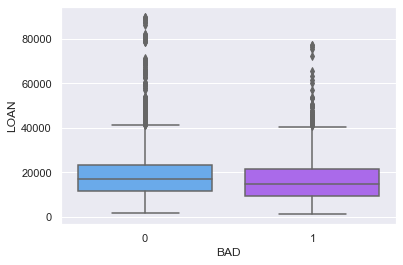

In [35]:
sns.boxplot(data["BAD"], data['LOAN'], palette="cool")

**Insights _______**
- The outliers for those who repaid their loan had higher amounts of loan approved than those who defaulted

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of categorical and continuous variables

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

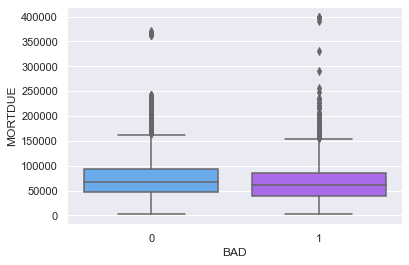

In [36]:
sns.boxplot(data["BAD"], data['MORTDUE'], palette="cool")

**Insights ______**
- The group of clients who defaulted on their loans have more outliers 

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

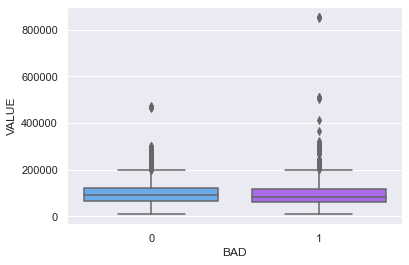

In [37]:
sns.boxplot(data["BAD"],data['VALUE'],palette="cool")

**Insights ______**
- The group of clients who defaulted on their loans have outliers who have higher current property values

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

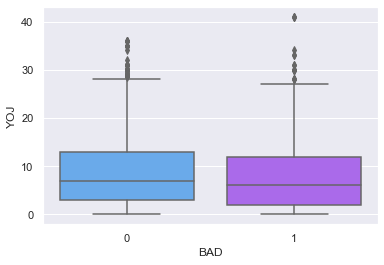

In [38]:
sns.boxplot(data["BAD"],data['YOJ'],palette="cool")

**Insights ______**
- Generally, the group of clients who repaid their loans have more years at their present jobs, but not with a striking difference.

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

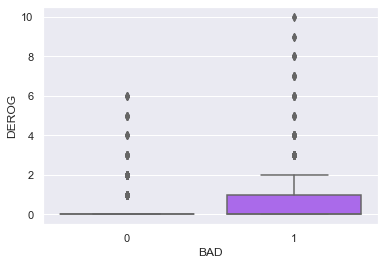

In [39]:
sns.boxplot(data["BAD"],data['DEROG'],palette="cool")

**Insights ______**
- Clients who defaulted on their loans had more derogatory reports 

<AxesSubplot:xlabel='BAD', ylabel='DELINQ'>

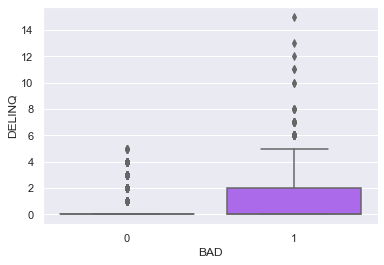

In [40]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="cool")

**Insights ______**
- Clients who defaulted on their loans had more delinquent credit lines

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

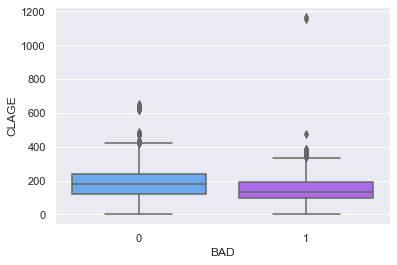

In [41]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="cool")

**Insights ______**
- Clients who repaid their loans have older credit lines than those who defaulted

<AxesSubplot:xlabel='BAD', ylabel='NINQ'>

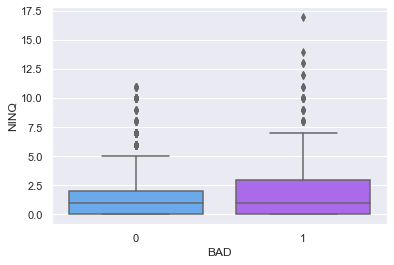

In [42]:
sns.boxplot(data["BAD"],data['NINQ'],palette="cool")

**Insights ______**
- Clients who defaulted on their loans had more recent credit inquiries

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

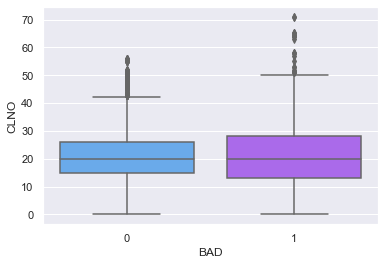

In [43]:
sns.boxplot(data["BAD"],data['CLNO'],palette="cool")

**Insights ______**
- Clients who defaulted on their loans had more existing credit lines

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

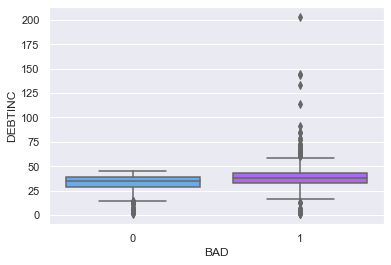

In [44]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="cool")

**Insights ______**
- Clients who defaulted on their loans had higher debt-to-income ratio

<AxesSubplot:xlabel='REASON', ylabel='LOAN'>

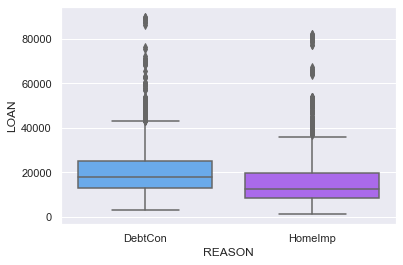

In [45]:
sns.boxplot(data["REASON"],data['LOAN'],palette="cool")

**Insights ______**
- More loans were for debt consolidation purposes

<AxesSubplot:xlabel='JOB', ylabel='YOJ'>

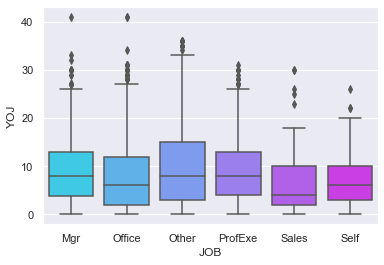

In [46]:
sns.boxplot(data["JOB"],data['YOJ'],palette="cool")

**Insights ______**
- Sales people have been with their jobs the shortest while the Other group the longest

<AxesSubplot:xlabel='REASON', ylabel='CLAGE'>

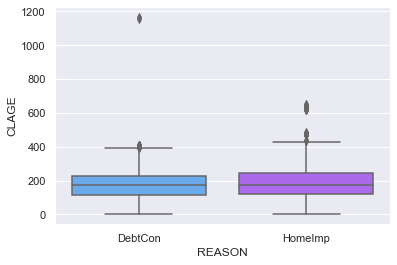

In [47]:
sns.boxplot(data["REASON"],data['CLAGE'],palette="cool")

**Insights ______**
- Clients who took a loan for home improvement purposes had older credit lines than those who took a loan for debt consolidation purposes

<AxesSubplot:xlabel='REASON', ylabel='CLNO'>

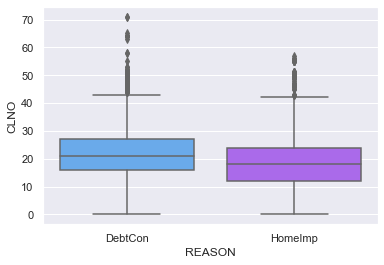

In [48]:
sns.boxplot(data["REASON"],data['CLNO'],palette="cool")

**Insights ______**
- Clients who got a loan for debt consolidation purposes had more credit lines than those who loaned for home improvement purposes

<AxesSubplot:xlabel='JOB', ylabel='DEBTINC'>

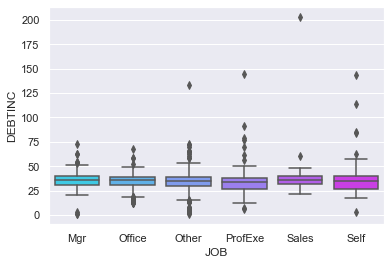

In [49]:
sns.boxplot(data["JOB"],data['DEBTINC'],palette="cool")

**Insights ______**
- Clients in Sales had a higher debt-to-income ratio 

<AxesSubplot:xlabel='JOB', ylabel='LOAN'>

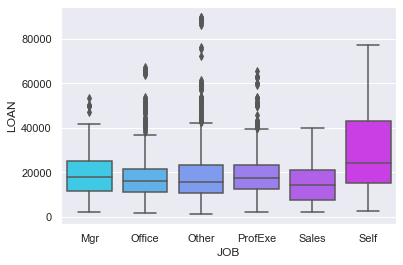

In [50]:
sns.boxplot(data["JOB"],data['LOAN'],palette="cool")

**Insights ______**
- Clients who are self-employed had the highest amount of approved loan while Sales people had the lowest

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

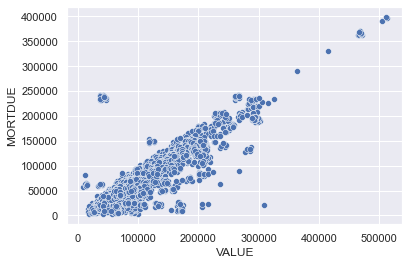

In [51]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights: _______**
- Current value of the property is positively correlated to the amount due on existing mortgage

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='LOAN', ylabel='MORTDUE'>

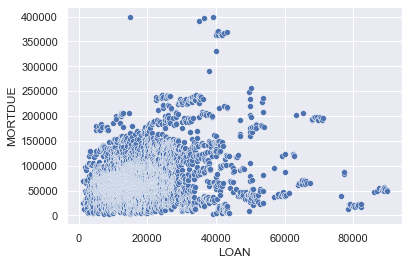

In [52]:
sns.scatterplot(data["LOAN"],data['MORTDUE'],palette="PuBu")

**Insights: _______**
- Approved loan amount is somewhat positively correlated to the amount due on existing mortgage

<AxesSubplot:xlabel='LOAN', ylabel='VALUE'>

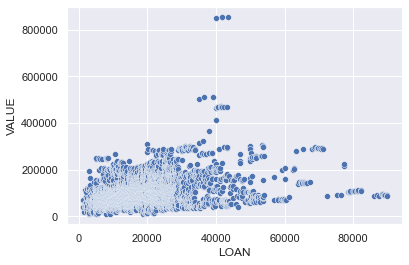

In [53]:
sns.scatterplot(data["LOAN"],data['VALUE'],palette="PuBu")

**Insights: _______**
- There is some positive correlation between approved loan amount and the current value of the property

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [54]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for BAD and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


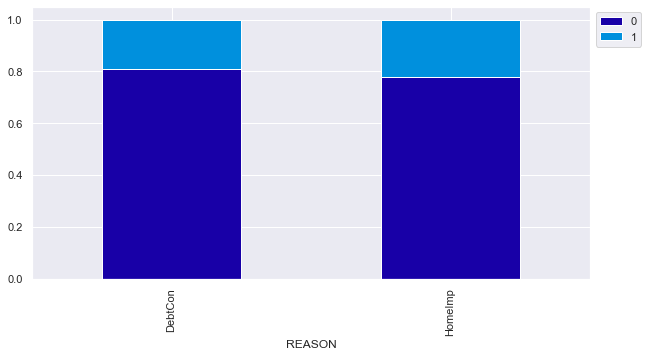

In [55]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights _______**
- A little less percentage of clients defaulted on their loans whose purpose for the loan is debt consolidation compared to those who took a loan for home improvement purposes

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


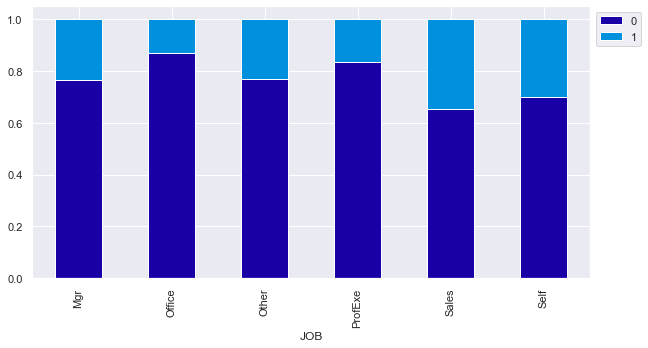

In [56]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

**Insights _______**
- Office workers have the least number of defaulters, while Sales clients have the most

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


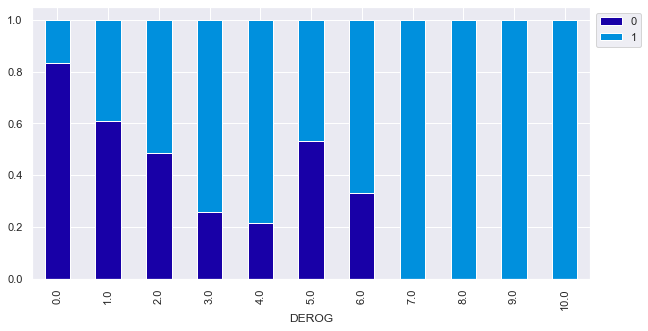

In [57]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['DEROG'])

**Insights _______**
- Clients who had 7 or more major derogatory reports defaulted on their loans

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


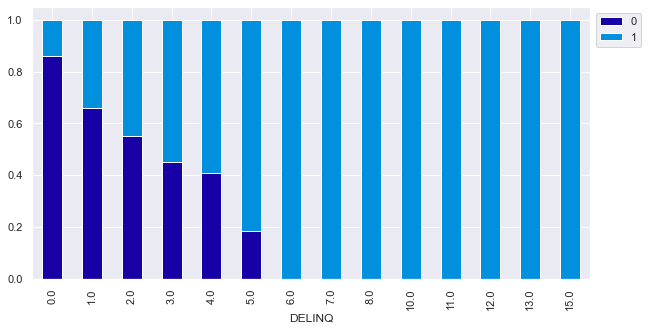

In [58]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['DELINQ'])

**Insights _______**
- Clients who had 6 or more delinquent credit lines defaulted on their loans. As the number of delinquent credit lines increase, the more likely the client defaults

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


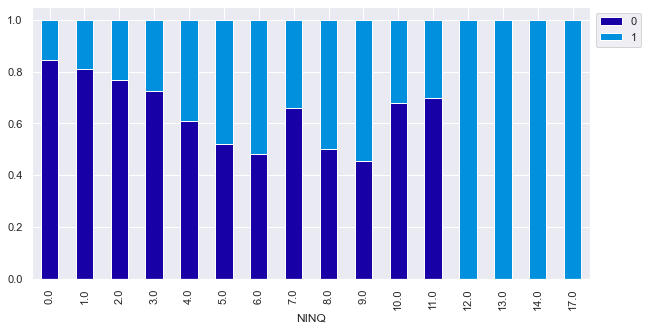

In [59]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['NINQ'])

**Insights _______**
- Clients who had 12 or more recent credit inquiries defaulted on their loans.

## **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

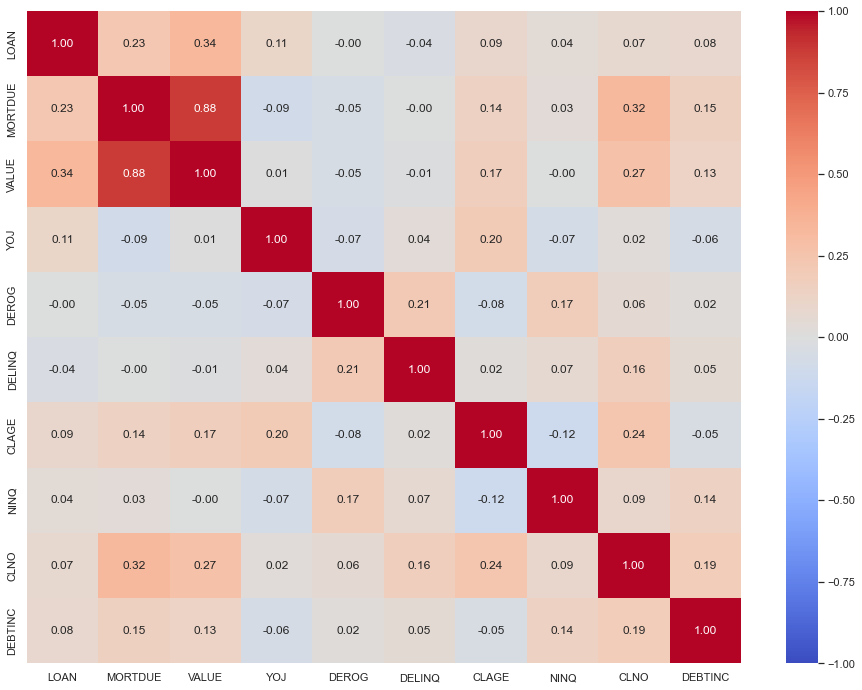

In [60]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

**Insights _______**
- VALUE and MORTDUE have the highest positive correlation. LOAN and VALUE is next, followed by MORTDUE and CLNO, then VALUE and CLNO
- NINQ and CLAGE have the greatest negative correlation, followed by DEROG and CLAGE, then DEBTINC and CLAGE



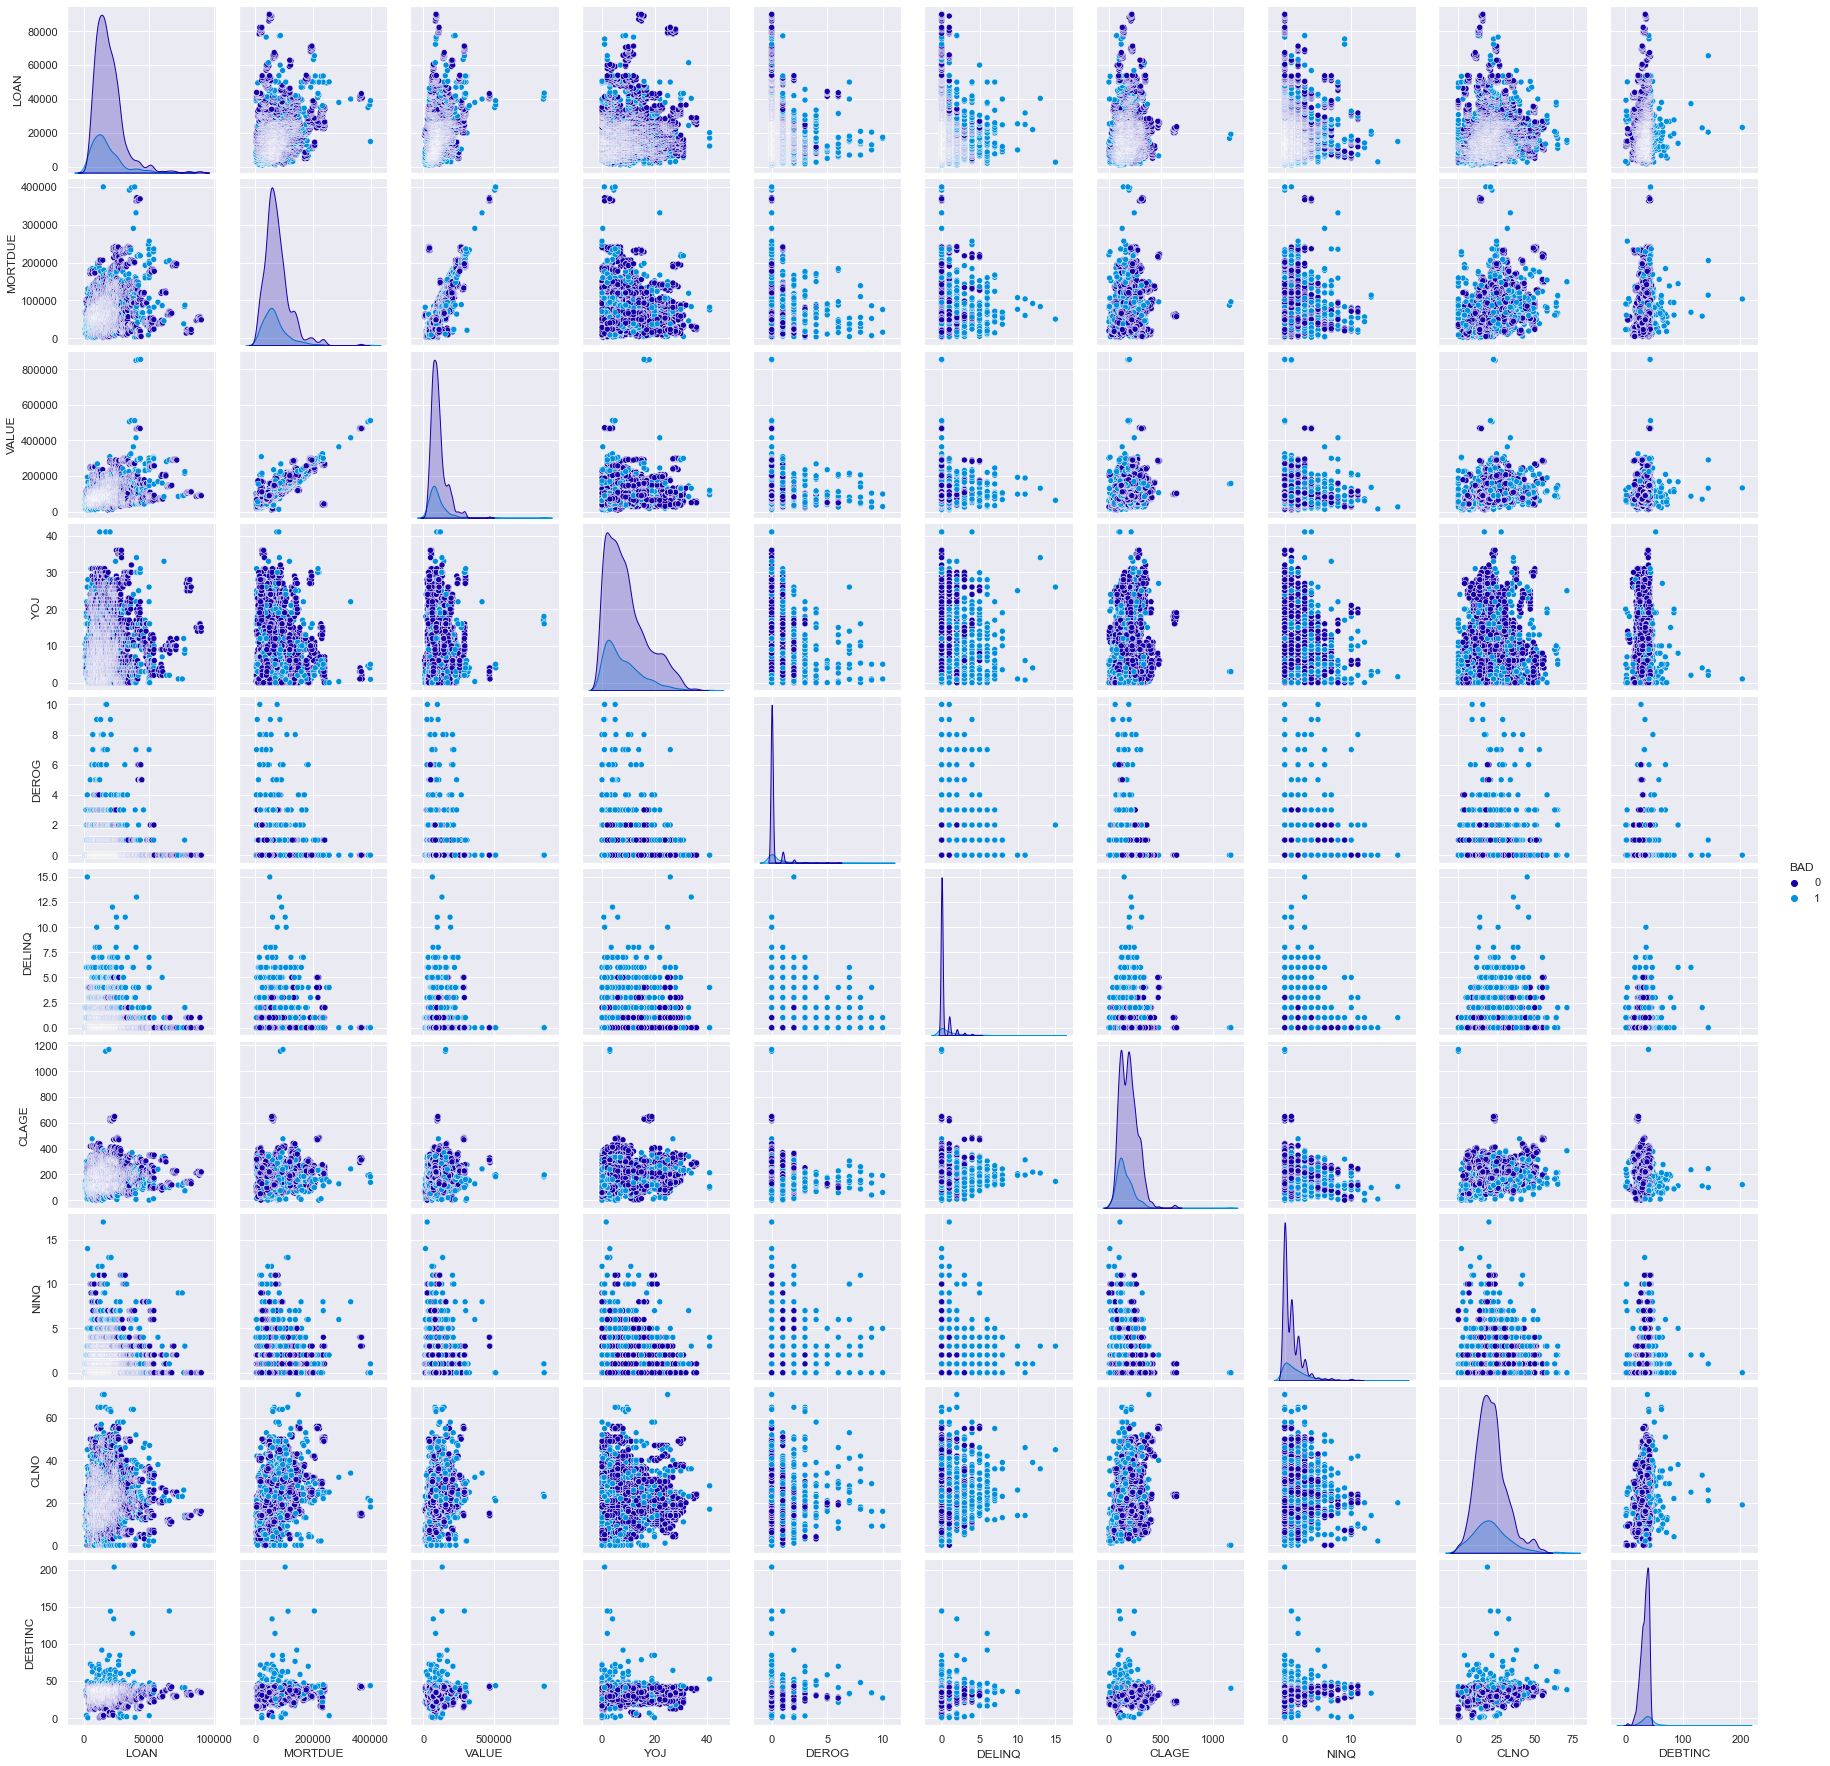

In [61]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue ='BAD')

**Insights _______**
- VALUE and MORTDUE clearly have a positive correlation

## Observation and Insights

The following are the notable observations and insights derived from the Exploratory Data Analysis.

- There are 5,960 observations and 13 columns in the dataset. The BAD and LOAN columns do not have missing values and all the other columns do.
- The LOAN, MORTDUE, VALUE variables have a lot of outliers.
- The DEBTINC plot has outliers both below the minimum and above the maximum values.
- 19.9% of the client population make up the percentage who defaulted on their loans.
- Debt consolidation makes up 65.9% of the reason for a loan request, while 29.9% had home improvement as the reason.
- Clients who repaid their loans have older credit lines than those who defaulted.
- Clients who defaulted on their loans had more recent credit inquiries, more existing credit lines, and had higher debt-to-income ratio compared to the clients who repaid their loans.
- Clients who had jobs in Sales had a higher debt-to-income ratio
- Clients who are self-employed had the highest amount of approved loan while the Sales people had the lowest. 
- Current value of the property is positively correlated to the amount due on existing mortgage.

Since there are outliers and missing values, these have to be treated.
- For the outliers, all the values smaller than the corresponding lower whisker will be assigned the value of this lower whisker, while all the values greater than the corresponding upper whisker will be assigned the value of this upper whisker. 
- For the missing values, the median would be assigned to the missing values in the numeric columns, while the mode would be assigned to the missing values in the categorical columns.

### Treating Outliers

In [62]:
def treat_outliers(df, col):
    '''
    treat outliers in a variable
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1               # IQR range
    Lower_Whisker = Q1 - 1.5*(Q3-Q1)  # define lower whisker
    Upper_Whisker = Q3 + 1.5*(Q3-Q1)  # define upper whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_Whisker 
                                                             # and all the values above Upper_Whisker will be assigned value of Upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outliers in all numerical variables
    col_list: list of numerical variables
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df, c)
        
    return df 
    

In [63]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include = np.number).columns.tolist() # getting list of numerical columns

df = treat_outliers_all(df_raw, numerical_col)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   float64 
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(10)
memory usage: 483.7 KB


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18051.895973,9252.565294,1100.000000,11100.000000,16300.000000,23300.000000,41600.000000
MORTDUE,5442.0,71566.093752,37203.654400,2063.000000,46276.000000,65019.000000,91488.000000,159306.000000
VALUE,5848.0,98538.057633,45070.800236,8000.000000,66075.500000,89235.500000,119824.250000,200447.375000
YOJ,5445.0,8.873159,7.430914,0.000000,3.000000,7.000000,13.000000,28.000000
DEROG,5252.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,5380.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLAGE,5652.0,178.635811,80.495471,0.000000,115.116702,173.466667,231.562278,406.230642
NINQ,5450.0,1.093394,1.372692,0.000000,0.000000,1.000000,2.000000,5.000000
CLNO,5738.0,21.032851,9.420239,0.000000,15.000000,20.000000,26.000000,42.500000
DEBTINC,4693.0,33.681973,7.135236,14.345367,29.140031,34.818262,39.003141,53.797805


#### Adding new columns in the dataset for each column which has missing values 

In [66]:
# # For each column we create a binary flag for the row, if there is a missing value in the row, then 1, else 0. 

# def add_binary_flag(df, col):
#     '''
#     df: it is the dataframe
#     col: it is a column which has missing values
#     It returns a dataframe which has binary flag for missing values in column col
#     '''
#     new_col = str(col)
#     new_col += '_missing_values_flag'
#     df[new_col] = df[col].isna()
#     return df

In [67]:
# # list of columns that has missing values in it

# missing_col = [col for col in df.columns if df[col].isnull().any()]

# for colmn in missing_col:
#     add_binary_flag(df, colmn)
    
# df.head()

#### Filling missing values in numerical columns with median and mode in categorical variables

In [68]:
# Treat missing values in numeric columns with median, and with mode in categorical variables

# Select numeric columns

num_data = df.select_dtypes('number')

# Select string and object columns

cat_data = df.select_dtypes('category').columns.tolist() # df.select_dtypes('object')

# Fill numeric columns with median

df[num_data.columns] = num_data.fillna(df.median())

# Fill object columns with mode

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   float64 
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(10)
memory usage: 483.7 KB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18051.895973,9252.565294,1100.000000,11100.000000,16300.000000,23300.000000,41600.000000
MORTDUE,5960.0,70997.067819,35597.710401,2063.000000,48139.000000,65019.000000,88200.250000,159306.000000
VALUE,5960.0,98363.244470,44663.105774,8000.000000,66489.500000,89235.500000,119004.750000,200447.375000
YOJ,5960.0,8.711300,7.122031,0.000000,3.000000,7.000000,12.000000,28.000000
DEROG,5960.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,5960.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLAGE,5960.0,178.368680,78.395960,0.000000,117.371430,173.466667,227.143058,406.230642
NINQ,5960.0,1.085403,1.312898,0.000000,0.000000,1.000000,2.000000,5.000000
CLNO,5960.0,20.994379,9.245170,0.000000,15.000000,20.000000,26.000000,42.500000
DEBTINC,5960.0,33.923529,6.348461,14.345367,30.763159,34.818262,37.949892,53.797805


## **Proposed Approach**
**1. Potential techniques** 

The machine learning techniques that would be appropriate for this classification problem are logistic regression, decision tree, and random forest since these models would not only facilitate the bank's loan approval decision-making process, but these would also be able to present the different factors that most influence a decision. The following can help identify these factors: coefficients derived from logistic regression, decision rules extracted from decision trees, and features importance obtained from random forest. Given then a set of information about a client and based on this available client data, the model will predict if the client will default on the loan or not and this model will also be interpretable enough to give the basis/justification for the prediction in accord with the client's data.

**2. Overall solution design**

The solution to the problem starts with data preparation for modeling, followed by splitting the data into train and test sets. Beginning with the simpler model, a logistic regression model is then built. A decision tree is next. Finally, a random forest is employed. The data is fitted then tested on each of these models. During assessment, it must also be checked if either overfitting or underfitting is occurring and address this issue if there is any. Hyperparameter tuning is utilized to generate better predictive models. Selecting the appropriate hyperparameter values produce more effective results. GridSearchCV is implemented in hyperparameter tuning.

These models are then evaluated using the performance metrics of accuracy, precision, recall, f1 score, with recall being the ruling metric.  The model that has the best performance metric, specifically recall, is chosen and established. The factors that most influence loan default are identified using coefficients drawn out from the logistic regression model, decision rules gathered from the decision tree, and features importance acquired in the random forest model. 


**3. Measures of success**

Since loan defaults is the bank's paramount concern, meaning that they lose more when they approve loans that end up getting defaulted, the performance metric that must be of prominent focus is recall. Recall has to be maximized since the greater the recall score, the lower the false negatives. The model with the highest recall would assist the bank in decreasing their losses due to approved loans that eventually become defaults.

## **Model Building - Approach**
1. Data preparation
2. Split the data into train and test sets
3. Fit on the training data
4. Tune the model, and prune the tree, if necessary
5. Test the model on the test set

### **Model Evaluation Criterion**

In [71]:
# creating metrics function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Data Preparation for the Logistic Regression Model**

**Separating the target variable from the other variables**

In [72]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [73]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(columns = ['BAD'])

# Create dummy variables for the categorical variables 

X = pd.get_dummies(X, drop_first = True)

# Create y(dependent variable)

y = df['BAD']

X.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1,0,1,0,0,0
1,1300.0,70053.0,68400.0,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262,1,0,1,0,0,0
2,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1,0,1,0,0,0
3,1500.0,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0
4,1700.0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1,1,0,0,0,0


In [74]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

**Splitting the data into 70% training set and 30% test set**

In [75]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)

### **Build a Logistic Regression Model**

In [76]:
# Defining the logistic regression model
lg = LogisticRegression(class_weight = {0: 0.20, 1: 0.80})

# Fitting the model on the training data 
lg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

**Checking the model performance on the train dataset**

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      3340
           1       0.33      0.67      0.44       832

    accuracy                           0.66      4172
   macro avg       0.61      0.66      0.60      4172
weighted avg       0.78      0.66      0.70      4172



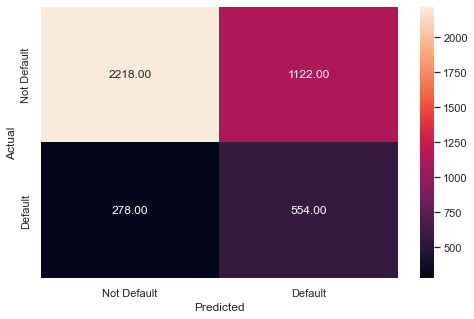

In [77]:
# Predict for train set
y_pred_train = lg.predict(X_train)

# Checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

**Checking the model performance on the test dataset**

              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1431
           1       0.32      0.63      0.42       357

    accuracy                           0.66      1788
   macro avg       0.60      0.65      0.59      1788
weighted avg       0.77      0.66      0.69      1788



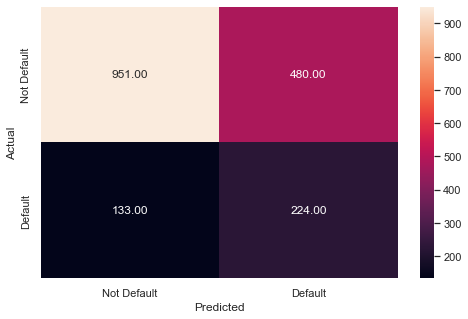

In [78]:
#Predict for test set
y_pred_test = lg.predict(X_test)

# Checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

**Observations:_______**
- For class 1, the recall for the training set is 0.67 and, for the test set, it is 0.63.
- Other models must be built to try to achieve one that has a higher recall than this, so that the bank can decrease the number of false negatives that they end up with from their underwriting process.

In [79]:
lg_train_recall = metrics.recall_score(y_train,y_pred_train)
lg_test_recall = metrics.recall_score(y_test,y_pred_test)
print(lg_train_recall)
print(lg_test_recall)

0.6658653846153846
0.6274509803921569


In [80]:
lg_train_precision = metrics.precision_score(y_train,y_pred_train)
lg_test_precision = metrics.precision_score(y_test,y_pred_test)
print(lg_train_precision)
print(lg_test_precision)

0.3305489260143198
0.3181818181818182


In [81]:
lg_train_acc = lg.score(X_train,y_train)
lg_test_acc = lg.score(X_test,y_test)
print(lg_train_acc)
print(lg_test_acc)

0.6644295302013423
0.6571588366890381


**Checking the coefficients and checking which variables are important and how they affect the process of loan approval**

In [82]:
# Printing the coefficients of the logistic regression model
cols = X.columns

coef_lg = lg.coef_

coef_df = pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)
coef_df.columns = ['Coefficient']
coef_df

,Coefficient
DEBTINC,0.414142
NINQ,0.310019
JOB_Sales,0.126730
REASON_HomeImp,0.116876
JOB_Self,0.086968
CLNO,0.006388
DEROG,0.000000
DELINQ,0.000000
VALUE,-0.009278
YOJ,-0.020966


[Text(0.5, 1.0, 'Coefficients of the Logistic Regression Model with default 0.5 threshold')]

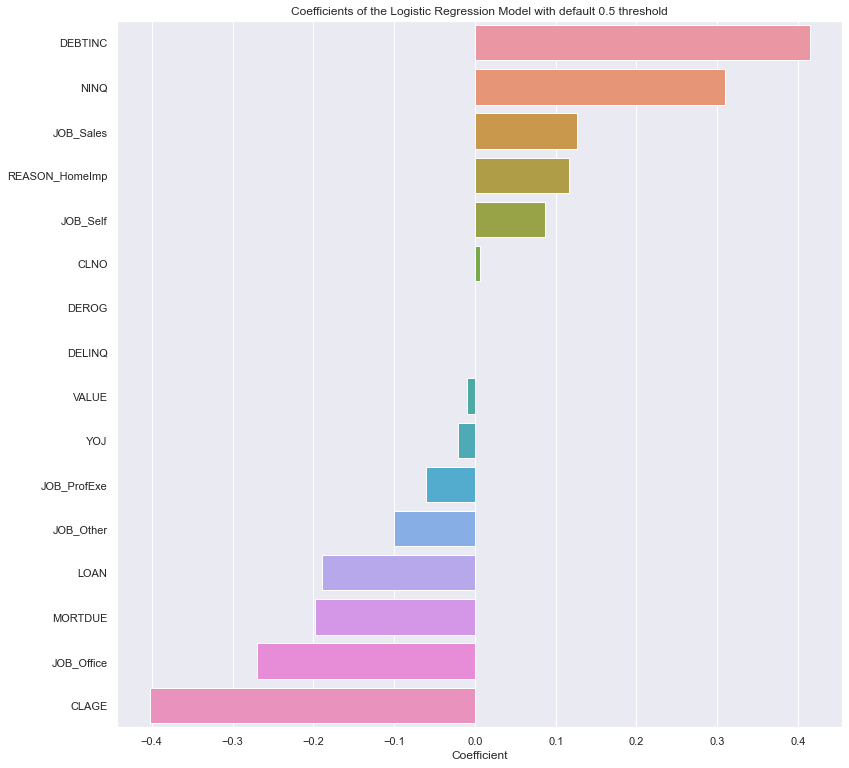

In [83]:
plt.figure(figsize = (13, 13))

sns.barplot(coef_df['Coefficient'],coef_df.index).set(title='Coefficients of the Logistic Regression Model with default 0.5 threshold')


**Observations:_______**

The following are the features which positively affect the loan default rate:
- DEBTINC
- NINQ
- JOB_Sales
- REASON_HomeImp
- JOB_Self
- CLNO

The following are the features which negatively affect the loan default rate:
- VALUE
- YOJ
- JOB_ProfExe
- JOB_Other
- LOAN
- MORTDUE
- JOB_Office
- CLAGE

In [84]:
# Finding the odds
Odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
odds_df = pd.DataFrame(Odds, X_train.columns, columns = ['Odds']).sort_values(by = 'Odds', ascending = False) 
odds_df

,Odds
DEBTINC,1.513071
NINQ,1.363451
JOB_Sales,1.135111
REASON_HomeImp,1.123980
JOB_Self,1.090862
CLNO,1.006409
DEROG,1.000000
DELINQ,1.000000
VALUE,0.990765
YOJ,0.979252


[Text(0.5, 1.0, 'Odds for Logistic Regression Model with default 0.5 threshold')]

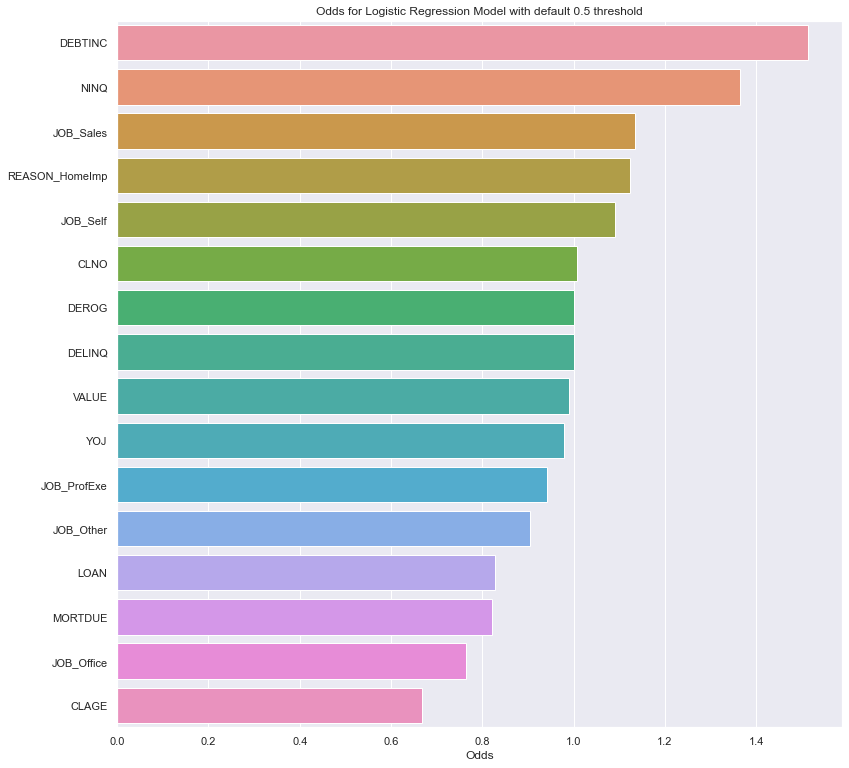

In [85]:
plt.figure(figsize = (13, 13))

sns.barplot(odds_df['Odds'],odds_df.index).set(title='Odds for Logistic Regression Model with default 0.5 threshold')

**Observations:_______**

- The odds of a client who has a higher debt-to-income ratio to default on his loan is 1.51 times the odds of a client who has a lower debt-to-income ratio 
- The odds of a client who has more recent credit inquiries to default on his loan is 1.36 times the odds of a client who has no or has lesser recent credit inquiries
- The odds of a person whose job is in Sales to default on his loan is 1.14 times the odds of a client whose job is not in Sales
- The odds of a person whose reason for the loan is home improvement to default on his loan is 1.12 times the odds of a client whose loan reason is debt consolidation

**The Precision-Recall Curve for Logistic Regression**

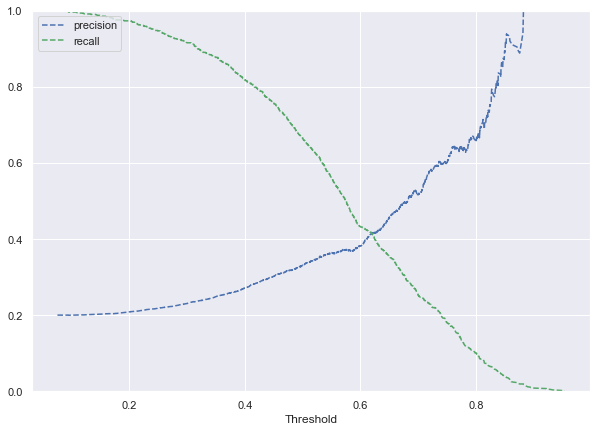

In [86]:
y_scores_lg = lg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:_______**

The precision and recall are balanced for a threshold of about 0.62

**Performance of the model at this threshold of 0.62**

In [87]:
# Defining the logistic regression model
lg2 = LogisticRegression(class_weight = {0: 0.20, 1: 0.80})

# Fitting the model on the training data 
lg2.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3340
           1       0.41      0.41      0.41       832

    accuracy                           0.77      4172
   macro avg       0.63      0.63      0.63      4172
weighted avg       0.77      0.77      0.77      4172



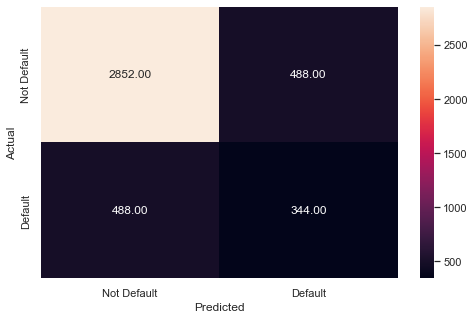

In [88]:
optimal_threshold1 = 0.62

y_pred_train2 = lg2.predict_proba(X_train)

metrics_score(y_train, y_pred_train2[:, 1] > optimal_threshold1)

##### **Observation:_______**

Recall is at 0.41 on the training data for class 1 at this 0.62 threshold

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1431
           1       0.36      0.35      0.35       357

    accuracy                           0.75      1788
   macro avg       0.60      0.60      0.60      1788
weighted avg       0.74      0.75      0.74      1788



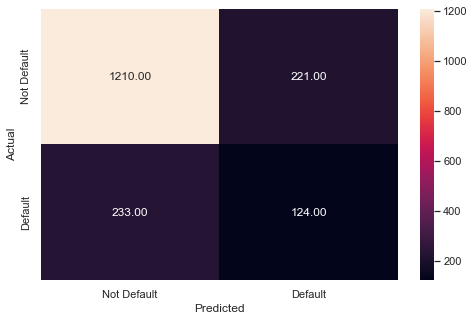

In [89]:
optimal_threshold1 = 0.62

y_pred_test2 = lg2.predict_proba(X_test)

metrics_score(y_test, y_pred_test2[:, 1] > optimal_threshold1)

**Observation:_______**

Recall is at 0.35 on the test data for class 1 at this 0.62 threshold, which is a poorer performance

In [90]:
lg2_train_recall = metrics.recall_score(y_train,y_pred_train2[:, 1] > optimal_threshold1)
lg2_test_recall = metrics.recall_score(y_test,y_pred_test2[:, 1] > optimal_threshold1)
print(lg2_train_recall)
print(lg2_test_recall)

0.41346153846153844
0.3473389355742297


In [91]:
lg2_train_precision = metrics.precision_score(y_train,y_pred_train2[:, 1] > optimal_threshold1)
lg2_test_precision = metrics.precision_score(y_test,y_pred_test2[:, 1] > optimal_threshold1)
print(lg2_train_precision)
print(lg2_test_precision)

0.41346153846153844
0.35942028985507246


In [92]:
lg2_train_acc = metrics.accuracy_score(y_train,y_pred_train2[:, 1] > optimal_threshold1)
lg2_test_acc = metrics.accuracy_score(y_test,y_pred_test2[:, 1] > optimal_threshold1)
print(lg2_train_acc)
print(lg2_test_acc)

0.7660594439117929
0.7460850111856824


### **Data Preparation for the Tree-based Models**

In [93]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [94]:
# # Add binary flags
# # List of columns that has missing values in it
# missing_col = [col for col in data.columns if data[col].isnull().any()]

# for colmn in missing_col:
#     add_binary_flag(data,colmn)
    
# data.head()

In [95]:
# Treat missing values in numeric columns with median, and with mode in categorical variables

# Select numeric columns

num_data = data.select_dtypes('number')

# Select string and object columns

cat_data = data.select_dtypes('category').columns.tolist() # df.select_dtypes('object')

# Fill numeric columns with median

data[num_data.columns] = num_data.fillna(data.median())

# Fill object columns with mode

for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [97]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


**Separating the target variable y and independent variable X**

In [98]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = data.drop(columns = ['BAD'])

# Create dummy variables for the categorical variables 

X = pd.get_dummies(X, drop_first = True)

# Create y(dependent variable)

y = data['BAD']

X.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,1,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1,0,1,0,0,0
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1,1,0,0,0,0


**Splitting the data**

In [99]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

In [100]:
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)

print("\n")

print("Percentage of the classes in the training set:")
print(y_train.value_counts(normalize = True))

print("\n")

print("Percentage of the classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)


Percentage of the classes in the training set:
0    0.800575
1    0.199425
Name: BAD, dtype: float64


Percentage of the classes in the test set:
0    0.800336
1    0.199664
Name: BAD, dtype: float64


### **Build a Decision Tree Model**

In [101]:
# Defining the decision tree model with class_weight = {0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

# Fitting the decision tree model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



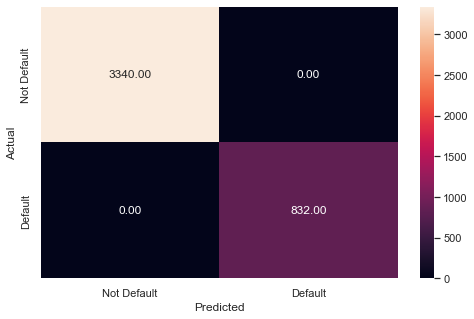

In [102]:
# Checking performance on the training data
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observations:_______**

The decision tree model is giving 100% scores for all the performance metrics on the training dataset. There is a need to check if this model is overfitting on the training dataset.

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1431
           1       0.69      0.61      0.65       357

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.78      1788
weighted avg       0.86      0.87      0.86      1788



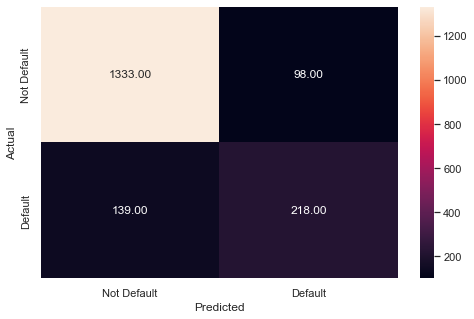

In [103]:
# Checking performance on the testing data
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:_______**

The decision tree model is giving a 61% recall for class 1 on the test dataset and this is significantly lower than the 100% recall on the training data. This model is overfitting.

**Using GridSearchCV for hyperparameter tuning on the model**

In [104]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['entropy', 'gini'],
              'min_samples_leaf': [5, 10, 15, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator/algorithm to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=25, random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3340
           1       0.61      0.83      0.70       832

    accuracy                           0.86      4172
   macro avg       0.78      0.85      0.81      4172
weighted avg       0.89      0.86      0.87      4172



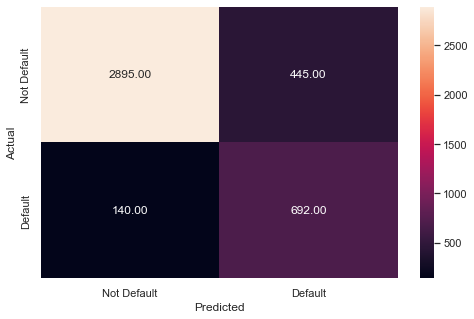

In [105]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1431
           1       0.57      0.76      0.65       357

    accuracy                           0.84      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.84      0.85      1788



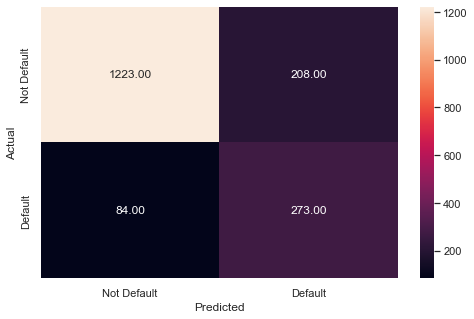

In [106]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:_______**

The tuned decision tree model is giving a 83% recall on the training dataset and 76% on the test dataset, both on class 1. This model is performing the best out of all the models that have been built so far.

[Text(0.5, 1.0, 'Feature Importances for Tuned Decision Tree')]

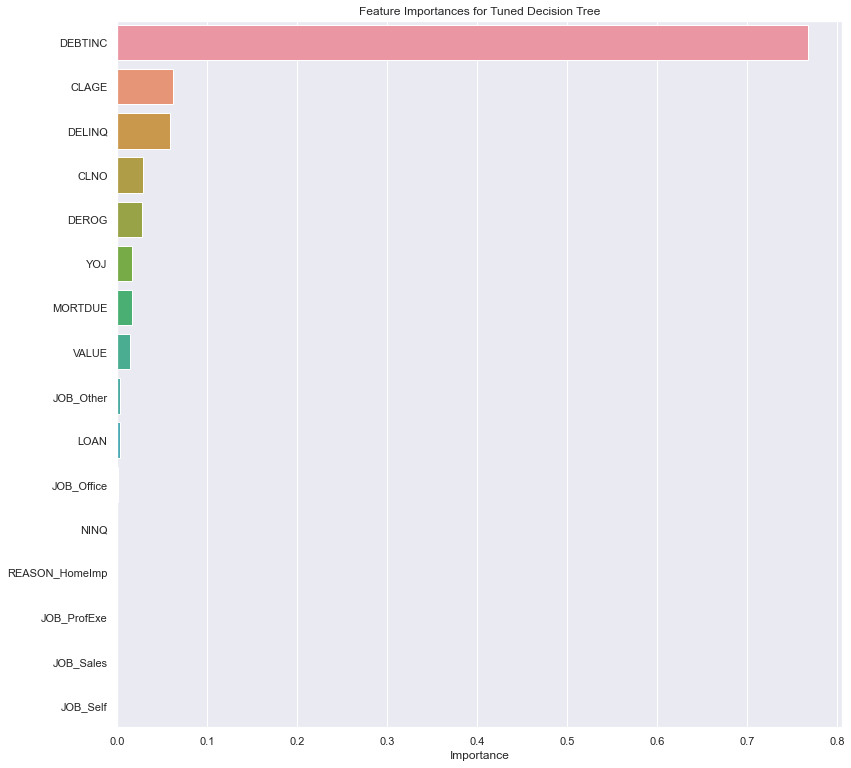

In [107]:
# Plot the feature importance

importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index).set(title='Feature Importances for Tuned Decision Tree')

**Observations:_______**

For this decision tree, the importance plot shows the following:

- DEBTINC is the most important feature at more than 75%
- This is followed by CLAGE then DELINQ. Both of these have importance less than 10% but more than 5%
- CLNO, DEROG, YOJ, MORTDUE, VALUE each have importance less than 5%

**Plotting the Decision Tree**

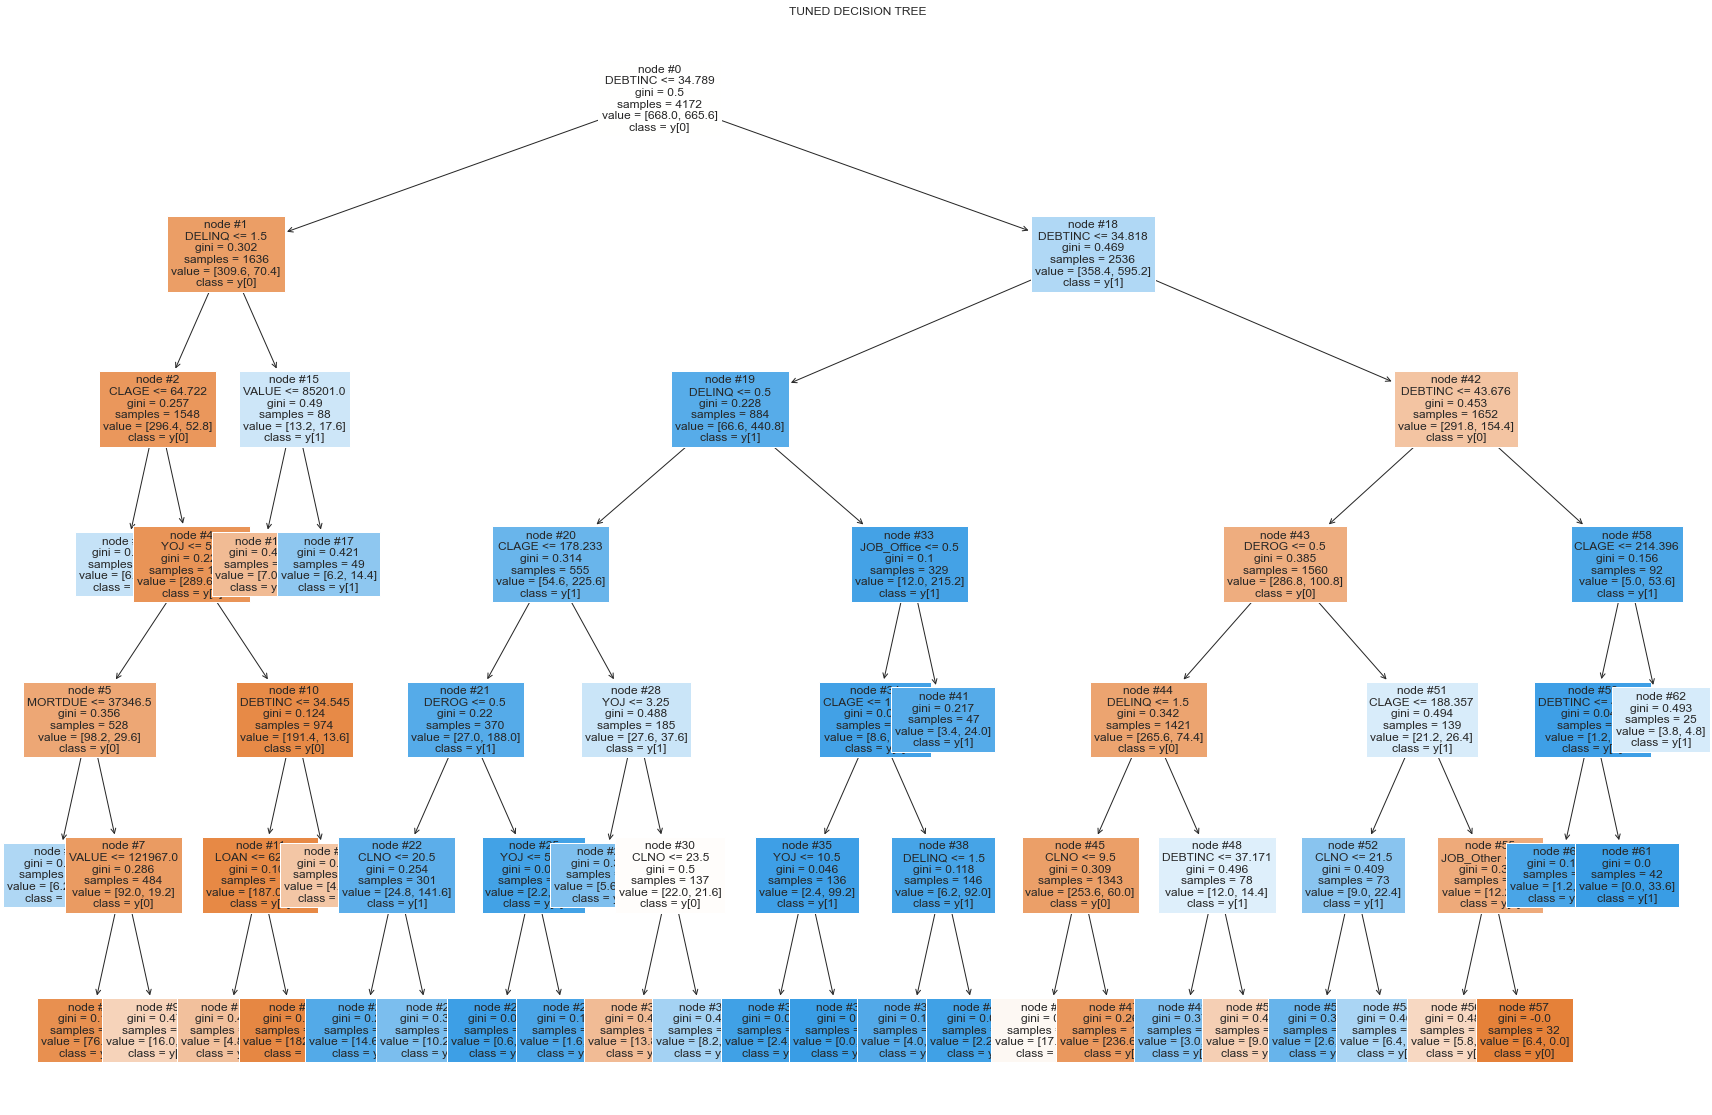

In [108]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator, max_depth = 6, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.title("TUNED DECISION TREE")
plt.show()



**Business Rules deduced from decision tree:**



- The higher the debt-to-income ratio, the more the likelihood of a loan default. A higher DEBTINC means a higher borrowing risk.
- DEBTINC greater than 34.789 has a very high likelihood of loan default
- DEBTINC less than or equal to 34.818 and with 1 or more DELINQ results in a high chance of loan default
- DEBTINC greater than 43.676 results in high probability of loan default
- DEBTINC in the range 34.83 to 43.676 and with 1 or more DEROG report has a chance of loan default
- Having delinquent credit lines indicates that the credit line is in danger of going into default
- DEROG reports indicate credit risk due to serious delinquency of a client


### **Build a Random Forest Model**

In [109]:
# Define the random forest classifier and fit the training data
rf_estimator = RandomForestClassifier(random_state = 42)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



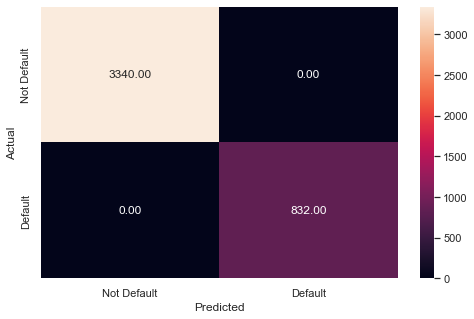

In [110]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observations:_______**

The random forest model is giving 100% scores for all the performance metrics on the training dataset. There is a need to check if this model is overfitting on the training dataset.

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.86      0.65      0.74       357

    accuracy                           0.91      1788
   macro avg       0.89      0.81      0.84      1788
weighted avg       0.91      0.91      0.90      1788



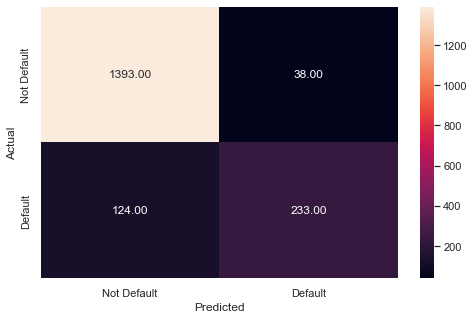

In [111]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:_______**

The random forest model is giving a 65% recall for class 1 on the test dataset and this is significantly lower than the 100% recall on the training data. This model is overfitting.

### **Build a Random Forest Model with class weights**

In [112]:
# Define the random forest model and fit on the training data
rf_estimatorw = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

rf_estimatorw.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



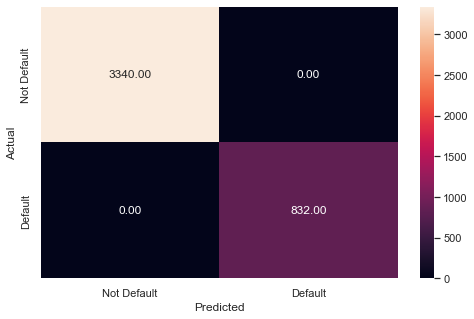

In [113]:
# Checking performance on the training data
y_pred_train_rf = rf_estimatorw.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observations:_______**

The random forest model with class weights is giving 100% scores for all the performance metrics on the training dataset. There is a need to check if this model is overfitting on the training dataset.

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.84      0.61      0.71       357

    accuracy                           0.90      1788
   macro avg       0.87      0.79      0.82      1788
weighted avg       0.90      0.90      0.89      1788



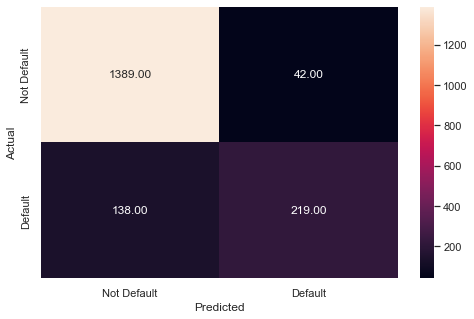

In [114]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimatorw.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:_______**

The random forest model with class weights is giving a 61% recall for class 1 on the test dataset and this is significantly lower than the 100% recall on the training data. This model is overfitting.

### **Build a Random Forest Model with class weight of balanced subsample**

In [115]:
# Define the random forest model and fit on the training data
rf_estimatorw2 = RandomForestClassifier(class_weight='balanced_subsample', random_state = 42)

rf_estimatorw2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



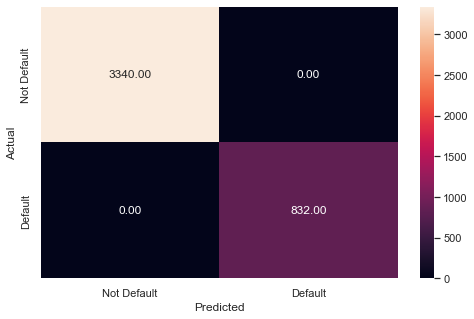

In [116]:
# Checking performance on the training data
y_pred_train_rf = rf_estimatorw2.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observations:_______**

The random forest model with class weight of balanced subsample is giving 100% scores for all the performance metrics on the training dataset. There is a need to check if this model is overfitting on the training dataset.

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.82      0.61      0.70       357

    accuracy                           0.90      1788
   macro avg       0.87      0.79      0.82      1788
weighted avg       0.89      0.90      0.89      1788



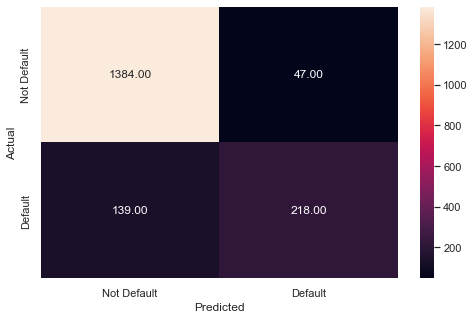

In [117]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimatorw2.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:_______**

The random forest model with class weight of balanced subsample is giving a 61% recall for class 1 on the test dataset and this is significantly lower than the 100% recall on the training data. This model is overfitting.

### **Tuning the Random Forest Model**

In [118]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [50, 150, 250],
        "max_depth": np.arange(5, 7),
        "min_samples_leaf": [150, 250, 350],
        "max_samples": [0.3, 0.5, 0.7]   
}


# Type of scoring used to compare parameter combinations -- recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the GridSearch
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

# Fit the GridSearch on the train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [119]:
# Fit the best algorithm to the data 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_samples=0.5, min_samples_leaf=250, n_estimators=150,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      3340
           1       0.43      0.83      0.56       832

    accuracy                           0.74      4172
   macro avg       0.69      0.78      0.69      4172
weighted avg       0.84      0.74      0.77      4172



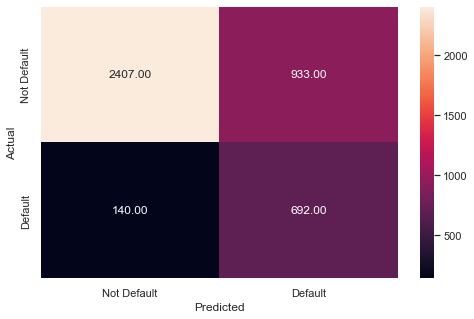

In [120]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1431
           1       0.40      0.80      0.54       357

    accuracy                           0.72      1788
   macro avg       0.67      0.75      0.67      1788
weighted avg       0.83      0.72      0.75      1788



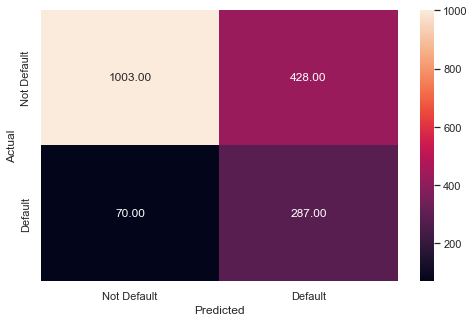

In [121]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:_______**

The tuned random forest model is giving a recall of 83% on the training dataset and 80% on the test dataset for class 1. This is much better than the basic random forest model.

**Feature importance of the tuned Random Forest**

importance_df


[Text(0.5, 1.0, 'Feature Importances for Tuned Random Forest')]

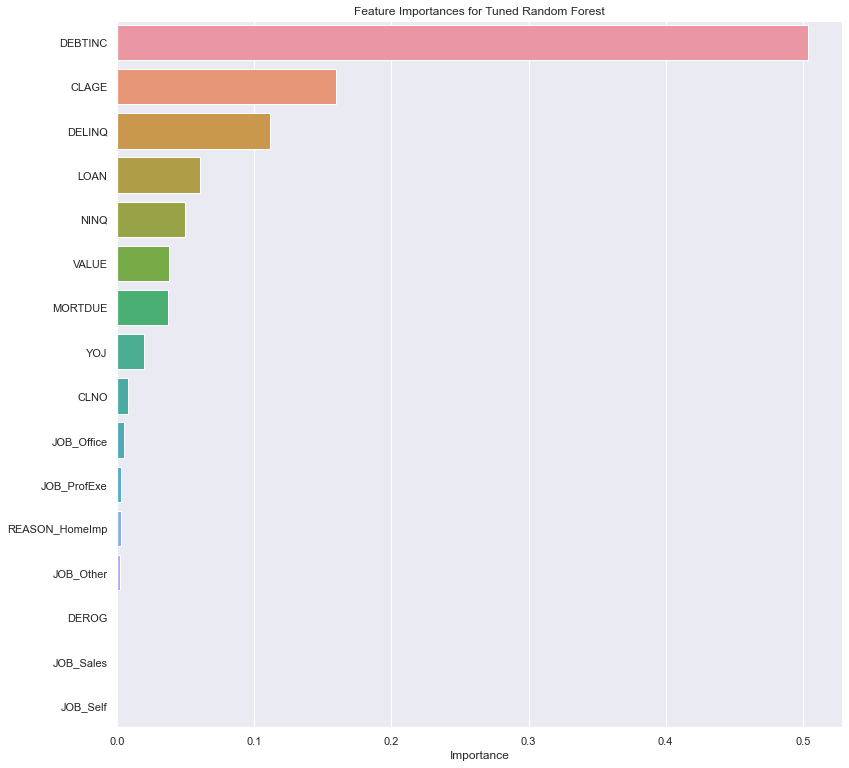

In [122]:
# Importance of features in the tree building (The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

print('importance_df')

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index).set(title='Feature Importances for Tuned Random Forest')

**Observations:_______**
- DEBTINC is the most important feature at more than 50%. The higher the debt-to-income ratio, the more the likelihood of a loan default.
- This is followed by CLAGE at more than 15%. 
- Next is DELINQ with more than 10%. Having delinquent credit lines indicates that the credit line is in danger of going into default
- LOAN is more than 5%
- This is closely followed by NINQ at around 5%
- VALUE, MORTDUE, YOJ, CLNO follow, each at less than 5%

## **Comparing Model Performances**

In [123]:
##  Function to calculate recall score
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [124]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [125]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [126]:
# List of all model names/variables 

models = [dt, dtree_estimator, rf_estimator, rf_estimatorw, rf_estimatorw2, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, recall, and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [127]:
acc_train

[1.0, 0.8597794822627037, 1.0, 1.0, 1.0, 0.7428092042186002]

In [128]:
# Adding metrics from Logistic Regression Model
acc_train.insert(0, lg_train_acc)
acc_test.insert(0, lg_test_acc)
recall_train.insert(0, lg_train_recall)
recall_test.insert(0, lg_test_recall)
precision_train.insert(0, lg_train_precision)
precision_test.insert(0, lg_test_precision)

In [129]:
acc_train

[0.6644295302013423,
 1.0,
 0.8597794822627037,
 1.0,
 1.0,
 1.0,
 0.7428092042186002]

In [130]:
# Adding metrics from Logistic Regression Model with Optimal Threshold
acc_train.insert(1, lg2_train_acc)
acc_test.insert(1, lg2_test_acc)
recall_train.insert(1, lg2_train_recall)
recall_test.insert(1, lg2_test_recall)
precision_train.insert(1, lg2_train_precision)
precision_test.insert(1, lg2_test_precision)

In [131]:
acc_train

[0.6644295302013423,
 0.7660594439117929,
 1.0,
 0.8597794822627037,
 1.0,
 1.0,
 1.0,
 0.7428092042186002]

In [132]:
# List of corresponding Model descriptive names 

comparison_frame = pd.DataFrame({'Machine Learning Model':['Logistic Regression', 'LR w/ Optimal Threshold', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'RF w/ 20:80 Class Weights', 'RF w/ CW of balanced subsample', 'Tuned Random Forest'],  
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Machine Learning Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.664430,0.657159,0.665865,0.627451,0.330549,0.318182
1,LR w/ Optimal Threshold,0.766059,0.746085,0.413462,0.347339,0.413462,0.359420
2,Decision Tree,1.000000,0.867450,1.000000,0.610644,1.000000,0.689873
3,Tuned Decision Tree,0.859779,0.836689,0.831731,0.764706,0.608619,0.567568
4,Random Forest,1.000000,0.909396,1.000000,0.652661,1.000000,0.859779
5,RF w/ 20:80 Class Weights,1.000000,0.899329,1.000000,0.613445,1.000000,0.839080
6,RF w/ CW of balanced subsample,1.000000,0.895973,1.000000,0.610644,1.000000,0.822642
7,Tuned Random Forest,0.742809,0.721477,0.831731,0.803922,0.425846,0.401399


In [133]:
test_only = comparison_frame.drop(columns = ['Train_Accuracy', 'Train_Recall', 'Train_Precision'])
test_only

,Machine Learning Model,Test_Accuracy,Test_Recall,Test_Precision
0,Logistic Regression,0.657159,0.627451,0.318182
1,LR w/ Optimal Threshold,0.746085,0.347339,0.359420
2,Decision Tree,0.867450,0.610644,0.689873
3,Tuned Decision Tree,0.836689,0.764706,0.567568
4,Random Forest,0.909396,0.652661,0.859779
5,RF w/ 20:80 Class Weights,0.899329,0.613445,0.839080
6,RF w/ CW of balanced subsample,0.895973,0.610644,0.822642
7,Tuned Random Forest,0.721477,0.803922,0.401399


In [134]:
print(test_only.index)

RangeIndex(start=0, stop=8, step=1)


In [135]:
test_only.set_index("Machine Learning Model")

,Test_Accuracy,Test_Recall,Test_Precision
Machine Learning Model,,,
Logistic Regression,0.657159,0.627451,0.318182
LR w/ Optimal Threshold,0.746085,0.347339,0.359420
Decision Tree,0.867450,0.610644,0.689873
Tuned Decision Tree,0.836689,0.764706,0.567568
Random Forest,0.909396,0.652661,0.859779
RF w/ 20:80 Class Weights,0.899329,0.613445,0.839080
RF w/ CW of balanced subsample,0.895973,0.610644,0.822642
Tuned Random Forest,0.721477,0.803922,0.401399


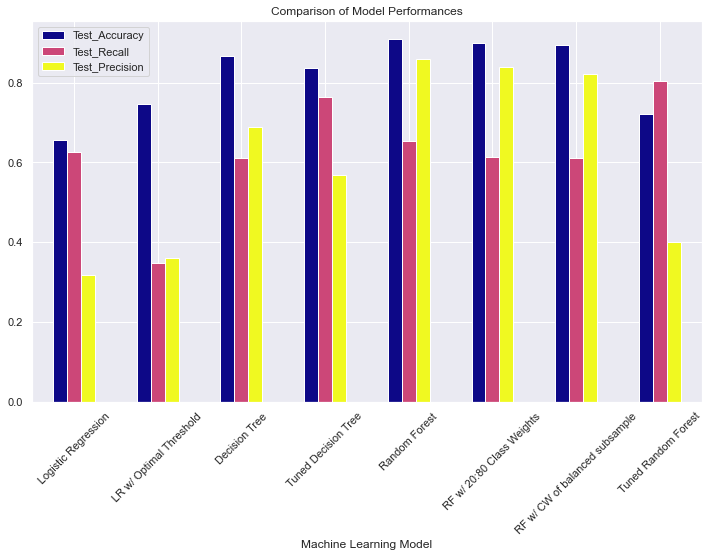

In [136]:
ax  = test_only.plot.bar(figsize = (12,7), colormap = "plasma", title = "Comparison of Model Performances", x = "Machine Learning Model", rot=45)
ax.legend(loc='best')
plt.show()

**Insights**

**1. Refined insights**

To solve the loan default prediction problem, different classification models were built using 3 major techniques: Logistic Regression, Decision Tree, and Random Forest. Subsequently, the best model is picked out from each of these subgroups. Observations from these follow:

**Logistic Regression**

For the Logistic Regression technique, 2 models were built, namely, the Logistic Regression Model with the default threshold of 0.5 and the other with the optimal threshold of 0.62. Comparing their performance metrics, the Logistic Regression Model with the default threshold had a higher recall than the one with the optimal threshold.

**Decision Tree**

For the Decision Tree technique, 2 models were built, namely, the untuned Decision Tree and the Tuned Decision Tree. The Tuned Decision Tree gave a higher recall that outperformed the untuned one. 

**Random Forest**

For the Random Forest model, 4 models were built, namely, the untuned Random Forest, Random Forest w/ 20:80 Class Weights, Random Forest w/ Class Weights of balanced subsample, and Tuned Random Forest.  Among these models, the Tuned Random Forest gave the highest recall.

**COMPARING THESE 3 MODELS which are the best from each subgroup,** the following are observed with regards to the important features that most affect loan defaults:

DEBTINC has the most impact on loan defaults out of all the features in all 3 models. It is also the only important feature that positively affects the loan default rate in the Logistic Regression model output that is also present in both of the other 2 models. Debt-to-income ratio is the percentage of a client’s gross monthly income that is used to pay his monthly debt and determines his borrowing risk. The higher the debt-to-income ratio of a client, the more the likelihood of him defaulting on his loan.

For the Decision Tree and Random Forest models, the other important features which affect loan default that are present in both these models are CLAGE, DELINQ, LOAN, VALUE, MORTDUE, YOJ, and CLNO, although the order of importance differs between these 2 models. CLAGE is the age of the oldest credit line in months and the presence of older credit lines means that it takes the client longer to pay his debts and this can imply difficulty in paying loans. DELINQ is the number of delinquent credit lines that a client has and the more of this that he has, the harder for him to make a payment on his loan which increases the danger of a failure to pay. LOAN is the amount of approved loan and the higher this is, the more prone for the loan to getting defaulted. The HELOC (Home Equity Line of Credit) amount depends on the MORTDUE (amount due on the existing mortgage) and VALUE (current value of the property) and the higher these amounts are the more they affect loan defaults. YOJ is years at present job and the longer the client has been at his current job, the more stable his source of income and ability to repay his debts. CLNO is the number of existing credit lines and the more of this the client has, the more his financial obligations, which creates a greater risk for a loan default.

Because we can deduce the importance of each of these features affecting loan defaults from the machine learning model, the bank can use the machine learning model to both predict the probability of a client defaulting on a loan and also have a basis for the justification of the decision of either approving or rejecting a specific HELOC application.

**2. Comparison of various techniques and their relative performance**

The recall score is the ruling metric for this loan default prediction project, and, as such, this is what is compared in the performance of the different models that were built in this project to identify the best one with the highest recall. The Logistic Regression with optimal threshold has the lowest recall score at 35%. The models:  Logistic Regression with default threshold, Untuned Decision Tree, Untuned Random Forest, Random Forest with 20:80 class weights, and Random Forest w/ class weights of balanced subsample, all have recall scores in the 60s % range. The Tuned Decision Tree has a recall score of 76%. 

The Tuned Random Forest has the highest recall score at 80%.  It is the preferred model since a random forest is an ensemble learning method that builds multiple decision trees and combines the predictions from these individual decision tree models to produce one optimal model. The random forest is more robust than the decision tree and also addresses the problem of overfitting.

This current Tuned Random Forest model that was produced in this project can be improved upon by adjusting the values of the hyperparameters and/or adding more hyperparameters and tune this model to further increase its recall score.

**3. Proposal for the final solution design**

The Tuned Random Forest model is proposed to be the model to be adopted by the bank’s consumer credit department for their loan default prediction within their HELOC approval process. It is the best solution as it will give the highest recall score, considering that it is using the power of multiple decision trees to come up with the best decision for a particular loan approval scenario. With the best higher recall score, false negatives in predictions are reduced. The decision-making process for HELOC acceptance is simplified by this model. Moreover, from its feature importance capability, the model is interpretable enough to ascertain the important factors that have the most impact on the credit score of a client and thus justification is provided for the rejection or approval of the loan.

The Tuned Random Forest that was arrived at in this project still has to be tuned further before a final model is adopted. The solution still has to be designed optimally with the goal of achieving a higher recall score that significantly decreases even more the false negatives. And as the model is tuned and improved, the feature importances accordingly change, and therefore a different set of important factors that affect loan default rates can be generated as output from the final model that would be the basis of the justification for a loan approval or rejection. All these aim to attain the bank’s target to have a more efficient and effective HELOC approval system in place.